**Author**: Rana Touqeer Attique 

**Date**: 24/11/2025 

**Case Study**: Pre-Inspection Vehicle Classification Case Study (ML-Driven)


Note: This dataset has been curated exclusively for research and learning purposes using a combination of simulated (Mockaroo) and real-world samples. The project follows a complete end-to-end data and machine learning lifecycle — beginning with Extract-Transform-Load (ETL), data cleaning, imputation, exploratory analysis, correlation diagnostics, feature engineering, and multi-class machine learning with performance evaluation to ensure insights are statistically valid and practically actionable.

Keypoints:

• Extract,Transform,Load (ETL) Proocess

• Data Cleaning and Data Wrangling Process

• Data Imputation Process e.g Missing values, Outliers etc. 

• Exploratory Data Analysis EDA

• Detailed Distribution Analysis

• Descriptive analysis 

• Quantile Analysis

• Correlational Analysis (Linear and Rank Based)

• Target variable (Balanced vs Imbalanced Classes analysis)

• Featured Engineering 

• Data preparation for Machine Learning (MultiClass Classification Problem)

• Testing Model for MultiClass Classification problem

• Performance Analysis via different Metrics




• Importing libraries

In [1]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

• Seaborn theme settings

In [2]:
# 'darkgrid'
# 'whitegrid'
# 'dark'
# 'white'
# 'ticks'
# Apply the default theme
# sns.set_theme(style='whitegrid')
sns.set_theme(style='whitegrid', palette='pastel')
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:10]

In [3]:
# Default Images Directory
image_S='D:/pre-inspection-vehicle-grading/Images/'

# if not os.path.exists(image_S):
#     os.makedirs(image_S, exist_ok=True)
#     print(f"Created directory: {os.path.abspath(image_S)}")

In [4]:
file_path = 'D:/pre-inspection-vehicle-grading/data/vehicle_grade.csv'
df = pd.read_csv(file_path)


• Note: I need to analyze the dataset metadata first, including its structure, row/column count, and data types, before proceeding.

• Top 10 rows

In [5]:
df.head(10)

,0,City,County,!@#$%^&*()%Category,Manufacturer,Model,Colour&*()%,image available,Mileage,Age Months,Fuel,Transmission,guideprice,NewPrice,Body type,Engine,Mot Expire Date,Is Running,Is A Taxi,Grade
0,1,Bristol,Bristol (Unitary Authority),Standard,MINI,HATCHBACK DIESEL,Red,0,70935,93,DIESEL,MANUAL,3044,14485.0,H,16,16/07/2025 00:00,Y,N,2.0
1,2,Derby,Derbyshire,Standard,VAUXHALL,ASTRA DIESEL HATCHBACK,White,1,80291,125,DIESEL,MANUAL,1796,20320.0,H,17,14/02/2026 00:00,Y,N,4.0
2,3,Sheffield,South Yorkshire,Trade,SEAT,IBIZA SPORT COUPE,Black,1,77043,133,PETROL,MANUAL,1416,9675.0,H,12,18/02/2025 00:00,Y,N,4.0
3,4,Bradford,West Yorkshire,Trade,VAUXHALL,CORSA HATCHBACK,White,1,76305,128,PETROL,MANUAL,1062,10975.0,H,10,05/07/2025 00:00,Y,N,4.0
4,5,Derby,Derbyshire,Trade,FORD,GALAXY DIESEL ESTATE,Black,0,145660,101,DIESEL,AUTOMATIC,1691,27225.0,E,20,03/03/2025 00:00,Y,Y,4.0
5,6,Gloucester,Gloucestershire,Premium,BMW,4 SERIES GRAN DIESEL COUPE,Black,0,83508,53,DIESEL,AUTOMATIC,12145,37130.0,H,20,08/01/2026 00:00,Y,N,2.0
6,7,Dundee,Angus (Council Area),Premium,MERCEDES-BENZ,GLA DIESEL HATCHBACK,Black,0,53351,65,DIESEL,AUTOMATIC,12982,32140.0,H,21,17/09/2025 00:00,Y,N,1.0
7,8,Luton,Bedfordshire,Trade,NISSAN,QASHQAI+2 DIESEL HATCHBACK,White,0,74099,96,DIESEL,MANUAL,4751,21220.0,H,15,10/03/2025 00:00,Y,N,4.0
8,9,Nottingham,Nottinghamshire,Standard,VOLKSWAGEN,SCIROCCO DIESEL COUPE,Silver,1,121394,131,DIESEL,MANUAL,3253,22370.0,C,20,13/08/2025 00:00,Y,N,4.0
9,10,Blackpool,Lancashire,Premium,VOLKSWAGEN,POLO HATCHBACK,Silver,0,44762,76,PETROL,MANUAL,5063,13010.0,H,10,08/09/2025 00:00,Y,N,4.0


• Bottom 10 rows

In [6]:
df.tail(10)

,0,City,County,!@#$%^&*()%Category,Manufacturer,Model,Colour&*()%,image available,Mileage,Age Months,Fuel,Transmission,guideprice,NewPrice,Body type,Engine,Mot Expire Date,Is Running,Is A Taxi,Grade
27069,27070,Manchester,Greater Manchester,Trade,FIAT,PUNTO EVO HATCHBACK,White,0,91639,113,PETROL,MANUAL,1192,10945.0,H,12,16/01/2026 00:00,Y,N,3.0
27070,27071,Cannock,Staffordshire,Trade,MINI,HATCHBACK,White,1,92742,161,PETROL,AUTOMATIC,1924,13920.0,H,16,10/10/2025 00:00,Y,N,4.0
27071,27072,Bradford,West Yorkshire,Trade,VOLKSWAGEN,GOLF DIESEL HATCHBACK,Silver,1,121163,146,DIESEL,MANUAL,1388,15176.0,H,19,05/04/2025 00:00,Y,N,5.0
27072,27073,Dundee,Angus (Council Area),Standard,CITROEN,C3 PICASSO DIESEL ESTATE,Blue,0,67876,114,DIESEL,MANUAL,2207,16440.0,E,16,02/02/2026 00:00,Y,N,3.0
27073,27074,Dundee,Angus (Council Area),Trade,AUDI,A4 DIESEL SALOON,Grey,1,121613,168,DIESEL,MANUAL,1906,25637.0,S,20,03/01/2026 00:00,Y,N,4.0
27074,27075,London,Greater London,Premium,BMW,3 SERIES SALOON SPECIAL EDITION,Grey,0,25072,42,DIESEL,AUTOMATIC,18631,41135.0,S,30,04/12/2025 00:00,Y,N,5.0
27075,27076,Preston,Lancashire,Trade,MINI,MINI COOPER,Unknown,1,105458,174,PETROL,MANUAL,1073,14737.0,V,16,11/04/2025 00:00,Y,N,4.0
27076,27077,Derby,Derbyshire,Trade,NISSAN,MICRA HATCHBACK,Red,1,76589,174,PETROL,MANUAL,674,8857.0,H,12,21/09/2025 00:00,Y,N,5.0
27077,27078,Sheffield,South Yorkshire,Trade,SKODA,FABIA HATCHBACK,Beige,1,101675,174,PETROL,MANUAL,644,8087.0,H,12,16/09/2025 00:00,Y,N,4.0
27078,27079,Bolton,Greater Manchester,Standard,AUDI,A4 DIESEL SALOON,Black,0,60506,94,DIESEL,MANUAL,7900,30225.0,S,20,18/06/2025 00:00,Y,N,2.0


In [7]:
# O_df is the original DataFrame for the refenrece.
# Note: Its better to have a original dataframe for safer side.

O_df=df.copy()

• Lets deep dive the columns behaviour e.g Unnamed columns, Special characters, Numeric column name or spaces between names etc.

In [8]:
df.columns

Index(['0', 'City', 'County', '!@#$%^&*()%Category', 'Manufacturer', 'Model',
       'Colour&*()%', 'image available', 'Mileage', 'Age Months', 'Fuel',
       'Transmission', 'guideprice', 'NewPrice', 'Body type', 'Engine',
       'Mot Expire Date', 'Is Running', 'Is A Taxi', 'Grade'],
      dtype='object')

• As it can clearly seen that there is some problems with the column names e.g special characters, spaces, lower case names,unnamed column etc.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27079 entries, 0 to 27078
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   0                    27079 non-null  int64  
 1   City                 27079 non-null  object 
 2   County               27079 non-null  object 
 3   !@#$%^&*()%Category  27079 non-null  object 
 4   Manufacturer         27079 non-null  object 
 5   Model                27079 non-null  object 
 6   Colour&*()%          27079 non-null  object 
 7   image available      27079 non-null  int64  
 8   Mileage              27079 non-null  int64  
 9   Age Months           27079 non-null  int64  
 10  Fuel                 27079 non-null  object 
 11  Transmission         27079 non-null  object 
 12  guideprice           27079 non-null  int64  
 13  NewPrice             26868 non-null  float64
 14  Body type            27079 non-null  object 
 15  Engine               27079 non-null 

• Lets start with the column fixation process as there is huge exceptional cases e.g. special characters, unnammed columns, Numeric column name, Spaces in column's names etc.

In [10]:
df_cols=pd.DataFrame(columns=["Columns_Before","Columns_After"])

df_cols["Columns_Before"]=df.columns
df_cols

,Columns_Before,Columns_After
0,0,NaN
1,City,NaN
2,County,NaN
3,!@#$%^&*()%Category,NaN
4,Manufacturer,NaN
5,Model,NaN
6,Colour&*()%,NaN
7,image available,NaN
8,Mileage,NaN
9,Age Months,NaN


• Note: This is very important as .ipynb is in notebooks folder and .py files are in Rana_utils folder, and both have different levels path so need to level up path from where the notebook is currently running.

In [11]:

# 1. Get the path of the directory that CONTAINS both 'notebooks' and 'Rana_utils'
# This navigates UP one level from where the notebook is currently running
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# 2. Add that parent directory to the Python system path
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added {project_root} to sys.path.")

Added d:\pre-inspection-vehicle-grading to sys.path.


In [12]:
from Rana_utils.datawrangling import fix_column_names
df,df_cols=fix_column_names(df,df_cols)

Hello from test.py


In [13]:
df_cols

,Columns_Before,Columns_After
0,0,Column_0
1,City,City
2,County,County
3,!@#$%^&*()%Category,Category
4,Manufacturer,Manufacturer
5,Model,Model
6,Colour&*()%,Colour
7,image available,ImageAvailable
8,Mileage,Mileage
9,Age Months,AgeMonths


• Lets see the datatypes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27079 entries, 0 to 27078
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Column_0        27079 non-null  int64  
 1   City            27079 non-null  object 
 2   County          27079 non-null  object 
 3   Category        27079 non-null  object 
 4   Manufacturer    27079 non-null  object 
 5   Model           27079 non-null  object 
 6   Colour          27079 non-null  object 
 7   ImageAvailable  27079 non-null  int64  
 8   Mileage         27079 non-null  int64  
 9   AgeMonths       27079 non-null  int64  
 10  Fuel            27079 non-null  object 
 11  Transmission    27079 non-null  object 
 12  Guideprice      27079 non-null  int64  
 13  Newprice        26868 non-null  float64
 14  BodyType        27079 non-null  object 
 15  Engine          27079 non-null  int64  
 16  MotExpireDate   25905 non-null  object 
 17  IsRunning       27079 non-null 

• As noticed most of the datasets have object datatype and need to convert data type wisely.

In [15]:
df=df.convert_dtypes()
df.dtypes

Column_0                   Int64
City              string[python]
County            string[python]
Category          string[python]
Manufacturer      string[python]
Model             string[python]
Colour            string[python]
ImageAvailable             Int64
Mileage                    Int64
AgeMonths                  Int64
Fuel              string[python]
Transmission      string[python]
Guideprice                 Int64
Newprice                   Int64
BodyType          string[python]
Engine                     Int64
MotExpireDate     string[python]
IsRunning         string[python]
IsATaxi           string[python]
Grade                      Int64
dtype: object

In [16]:
df_dTypes_info=pd.DataFrame(columns=["Column","Data_Types_Before","Data_Types_After"])

In [17]:
df_dTypes_info["Column"]=df.columns 
df_dTypes_info["Data_Types_Before"]=O_df.dtypes.values
df_dTypes_info["Data_Types_After"]=df.dtypes.values
df_dTypes_info

,Column,Data_Types_Before,Data_Types_After
0,Column_0,int64,Int64
1,City,object,string[python]
2,County,object,string[python]
3,Category,object,string[python]
4,Manufacturer,object,string[python]
5,Model,object,string[python]
6,Colour,object,string[python]
7,ImageAvailable,int64,Int64
8,Mileage,int64,Int64
9,AgeMonths,int64,Int64


Note: Automated datatype conversion is easy and fast approach but imprefect, as some ambiguous or insconsistent data may still default to string e.g dates or boolean datatypes which converted into string.

In [18]:
df_invalid_dates=df[df['MotExpireDate'] == '1800-01-01 00:00:00.000']
df_invalid_dates[['MotExpireDate','Guideprice', 'Newprice']] 


,MotExpireDate,Guideprice,Newprice
110,1800-01-01 00:00:00.000,20021,39600
117,1800-01-01 00:00:00.000,725,7410
131,1800-01-01 00:00:00.000,925,16395
186,1800-01-01 00:00:00.000,17484,32545
201,1800-01-01 00:00:00.000,23920,32420
...,...,...,...
26896,1800-01-01 00:00:00.000,21854,34500
26925,1800-01-01 00:00:00.000,10069,35090
26955,1800-01-01 00:00:00.000,1174,16535
26956,1800-01-01 00:00:00.000,7885,15325


As it can be noticed, 781 rows have default value and wrong format, I can simply delete these rows but want to save these rows and will apply feature engineering.

Note: Need to check empty rows as well.

In [19]:
df_null_dates=df[df['MotExpireDate'].isnull()]
df_null_dates[['MotExpireDate','Guideprice', 'Newprice']] 
print('There are ',df_null_dates.shape[0],' rows with null MotExpireDate data.')

There are  1174  rows with null MotExpireDate data.


In [20]:
df['MotExpireDate']

0        16/07/2025 00:00
1        14/02/2026 00:00
2        18/02/2025 00:00
3        05/07/2025 00:00
4        03/03/2025 00:00
               ...       
27074    04/12/2025 00:00
27075    11/04/2025 00:00
27076    21/09/2025 00:00
27077    16/09/2025 00:00
27078    18/06/2025 00:00
Name: MotExpireDate, Length: 27079, dtype: string

In [21]:
df["MotExpireDate"]=pd.to_datetime(df["MotExpireDate"],errors='coerce')
# df["MotExpireDate"]=pd.to_datetime(df["MotExpireDate"])
df_dTypes_info["Data_Types_After"]=df.dtypes.values
df_dTypes_info

,Column,Data_Types_Before,Data_Types_After
0,Column_0,int64,Int64
1,City,object,string[python]
2,County,object,string[python]
3,Category,object,string[python]
4,Manufacturer,object,string[python]
5,Model,object,string[python]
6,Colour,object,string[python]
7,ImageAvailable,int64,Int64
8,Mileage,int64,Int64
9,AgeMonths,int64,Int64


• Lets count the dataTypes 

In [22]:
df_dTypes_info["Data_Types_After"].value_counts()

Data_Types_After
string[python]    11
Int64              8
datetime64[ns]     1
Name: count, dtype: int64

In [23]:
df_dTypes_count=pd.DataFrame(columns=["DataType","DataType_Count","DataType_Percentage"])
df_dTypes_count["DataType"]=df.dtypes.value_counts().index  
df_dTypes_count["DataType_Count"]=df.dtypes.value_counts().values
df_dTypes_count["DataType_Percentage"]=(df.dtypes.value_counts().values/df.dtypes.value_counts().values.sum())*100
df_dTypes_count


,DataType,DataType_Count,DataType_Percentage
0,string[python],11,55.0
1,Int64,8,40.0
2,datetime64[ns],1,5.0


• It can clearly seen that, now our datatypes are perfect to work. But still few things to explore e.g duplicates, outliers, missing values, featured engineering or label encoding etc.

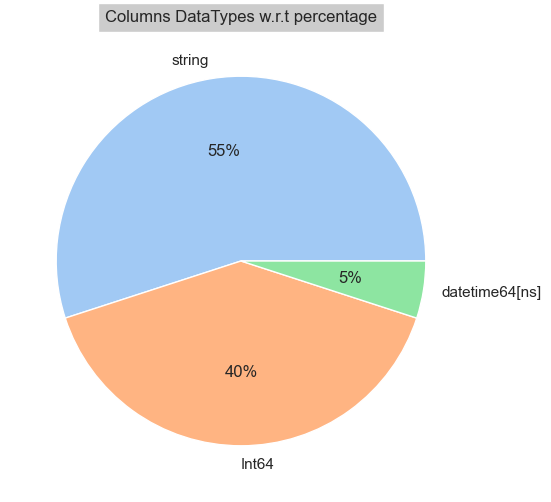

In [24]:
from Rana_utils.datawrangling import make_pie_chart
make_pie_chart(plt,df_dTypes_count,'DataType','DataType_Percentage',colors,"Columns DataTypes w.r.t percentage",image_S,"col_datatype_chart.png")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27079 entries, 0 to 27078
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Column_0        27079 non-null  Int64         
 1   City            27079 non-null  string        
 2   County          27079 non-null  string        
 3   Category        27079 non-null  string        
 4   Manufacturer    27079 non-null  string        
 5   Model           27079 non-null  string        
 6   Colour          27079 non-null  string        
 7   ImageAvailable  27079 non-null  Int64         
 8   Mileage         27079 non-null  Int64         
 9   AgeMonths       27079 non-null  Int64         
 10  Fuel            27079 non-null  string        
 11  Transmission    27079 non-null  string        
 12  Guideprice      27079 non-null  Int64         
 13  Newprice        26868 non-null  Int64         
 14  BodyType        27079 non-null  string        
 15  En

Note: As it can clearly seen that column named "column_0" is just a series which have no meaning other than rows number, so we can can delete it as need to find out duplicate rows.

In [26]:
df["Column_0"].head(2000)

0          1
1          2
2          3
3          4
4          5
        ... 
1995    1996
1996    1997
1997    1998
1998    1999
1999    2000
Name: Column_0, Length: 2000, dtype: Int64

Before dropping column "column_0" there are no duplicate rows.But after removing it can be seen that there were duplicate rows in the dataset.

In [27]:
df.duplicated().sum()

np.int64(0)

To resolve this, i removed that column.

In [28]:
df=df.drop(columns=["Column_0"],axis=1)

In [29]:
df.duplicated().sum()


np.int64(45)

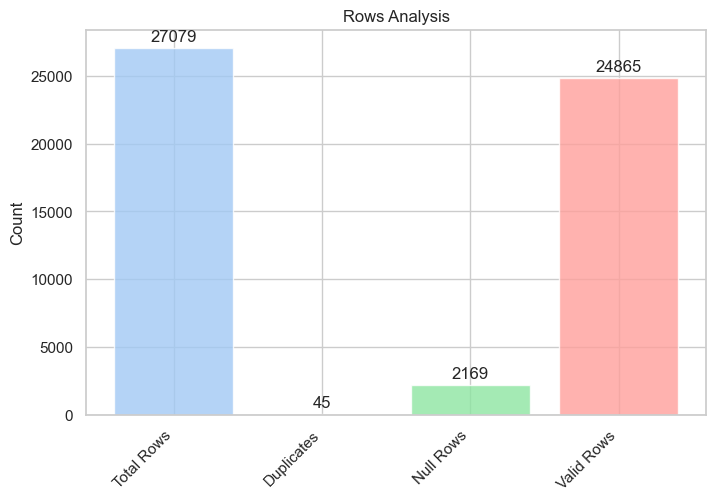

Number of duplicates: 45


In [30]:
nRows=df.shape[0]
num_duplicates = df.duplicated().sum()
num_null_rows = df.isnull().any(axis=1).sum()
valid_rows=nRows - num_null_rows - num_duplicates

labels = ['Total Rows', 'Duplicates', 'Null Rows','Valid Rows']
counts = [nRows, num_duplicates, num_null_rows, valid_rows]

plt.figure(figsize=(8, 5)) # Make figure wider to fit labels better
plt.bar(labels, counts, color=colors, alpha=0.8)

plt.xticks(rotation=45, ha='right') # Rotate and align text better
plt.ylabel('Count')
plt.title('Rows Analysis')

# --- Add this loop to display the value on each bar ---
for i, count in enumerate(counts):
    plt.text(i, count + max(counts) * 0.01, str(count), ha='center', va='bottom')
# -----------------------------------------------------

plt.savefig(image_S+"Rows_analysis.png", format='png', bbox_inches='tight')
plt.show()
print(f"Number of duplicates: {num_duplicates}")




Lets deep dive the other stuff e.g rows,columns,null_rows etc.


In [31]:
def deep_dive_rows_analysis(df,pd):

    unique_bool_threshold=2
    cardinality_threshold=20
    id_threshold_percent=95


    df_info=pd.DataFrame(columns=["Column","Data_Types","Total_values","Null_values","Not_Null_Values","Unique_Entries","Category_Type"])


    df_info["Column"]=df.columns
    df_info["Data_Types"]=df.dtypes.values
    df_info["Total_values"]=df.shape[0]
    df_info["Null_values"]=df.isnull().sum().values  
    df_info["Not_Null_Values"]=df.notnull().sum().values
    df_info["Unique_Entries"]=df.nunique().values

   
    # 1. Define the conditions using the flexible parameters
    conditions_list = [
        # Temporal (still relies on name substring match as generic indicator)
        df_info["Column"].str.contains("date|time", case=False, na=False), 
        
        # Binary/Boolean check using parameter
        df_info["Unique_Entries"] == unique_bool_threshold,                                     
        
        # Categorical check using parameter
        df_info["Unique_Entries"] <= cardinality_threshold,                                    
        
        # Potential ID/Series check using parameter
        df_info["Unique_Entries"] > id_threshold_percent, 
    ]

    # 2. Define the corresponding values if the condition is True
    choices_list = [
        "Temporal",
        "Boolean/Binary",
        "Nominal/Categorical",
        "Potential ID/Series",
    ]

    # 3. Apply the selection. 'Interval/Ratio' is the default if none of the above match.
    df_info["Category_Type"] = np.select(
        conditions_list, 
        choices_list, 
        default="Interval/Ratio" 
    )
        

    return df_info


In [32]:
df_rows=deep_dive_rows_analysis(df,pd)
df_rows

,Column,Data_Types,Total_values,Null_values,Not_Null_Values,Unique_Entries,Category_Type
0,City,string[python],27079,0,27079,20,Nominal/Categorical
1,County,string[python],27079,0,27079,18,Nominal/Categorical
2,Category,string[python],27079,0,27079,3,Nominal/Categorical
3,Manufacturer,string[python],27079,0,27079,56,Interval/Ratio
4,Model,string[python],27079,0,27079,1660,Potential ID/Series
5,Colour,string[python],27079,0,27079,18,Nominal/Categorical
6,ImageAvailable,Int64,27079,0,27079,2,Boolean/Binary
7,Mileage,Int64,27079,0,27079,24592,Potential ID/Series
8,AgeMonths,Int64,27079,0,27079,265,Potential ID/Series
9,Fuel,string[python],27079,0,27079,4,Nominal/Categorical


Note: Dealing with missing values is one of the most important and tricky part to do with the dataset.Easy approach is to delete the null rows and work with the rest of the dataset but in most cases there are organisation defined rules to deals with missing values, e.g Constant values or new feature column etc.There are several options.

Option 1: Drop missing values
df = df.dropna()


Option 2: Impute the Missing Values
You can use various imputation techniques, such as mean, median, mode, or advanced methods like regression imputation or K-nearest neighbors imputation.

Option 3: In our case, I assume "MotExpireDate" plays important role so its not a wise approach to impute as it has impact on other indicators but i prefer to use feature engineering, will explain later before deploying machine learning.

In case of NewPrice and Grade columns, its also affect the machine learnig model so I am deleting the null rows, as there are not specific instructions.


In [33]:
df_null_rows=df_rows[df_rows["Null_values"]>0]

In [34]:
df_null_rows

,Column,Data_Types,Total_values,Null_values,Not_Null_Values,Unique_Entries,Category_Type
12,Newprice,Int64,27079,211,26868,8723,Potential ID/Series
15,MotExpireDate,datetime64[ns],27079,1955,25124,499,Temporal
18,Grade,Int64,27079,11,27068,6,Nominal/Categorical


In [35]:
# df[df["Newprice"].isnull()]
# df[df["MotExpireDate"].isnull()]
df[df["Grade"].isnull()].head()



,City,County,Category,Manufacturer,Model,Colour,ImageAvailable,Mileage,AgeMonths,Fuel,Transmission,Guideprice,Newprice,BodyType,Engine,MotExpireDate,IsRunning,IsATaxi,Grade
1989,Nottingham,Nottinghamshire,Standard,PEUGEOT,207 HATCHBACK SPECIAL EDITIONS,Red,0,57636,118,PETROL,MANUAL,1742,12830,H,14,2025-05-10,Y,N,<NA>
3814,Derby,Derbyshire,Trade,MERCEDES-BENZ,E CLASS DIESEL SALOON,Grey,1,136667,191,DIESEL,AUTOMATIC,1319,35282,S,32,2025-08-31,Y,N,<NA>
4076,Manchester,Greater Manchester,Trade,FORD,FOCUS ESTATE,Blue,0,117991,183,PETROL,AUTOMATIC,702,16632,E,16,2026-01-01,N,N,<NA>
11381,Kingston upon Hull,East Riding of Yorkshire,Premium,HYUNDAI,IX35 PREMIUM CRDI,Unknown,0,44857,74,DIESEL,MANUAL,6475,22615,E,17,2025-08-25,Y,N,<NA>
12280,Derby,Derbyshire,Premium,VAUXHALL,MOKKA DIESEL HATCHBACK,White,0,36543,54,DIESEL,AUTOMATIC,6738,24384,H,16,2026-02-12,Y,N,<NA>


In [36]:
# Newprice,MotExpireDate,Grade
df = df.dropna(subset=['Newprice'])
df = df.dropna(subset=['Grade'])
# df=df['Grade'].dropna()

In [37]:
# df['Newprice'].isnull().sum()
# df['Grade'].isnull().sum()
df['MotExpireDate'].isnull().sum()

np.int64(1947)

Note: To save 1947 rows, I planned to use feature engineering.

In [38]:
current_date = pd.Timestamp.today().normalize()
df['MotExpireDate'].fillna(value=current_date, inplace=True)
df['MotExpireDate']

0       2025-07-16
1       2026-02-14
2       2025-02-18
3       2025-07-05
4       2025-03-03
           ...    
27074   2025-12-04
27075   2025-04-11
27076   2025-09-21
27077   2025-09-16
27078   2025-06-18
Name: MotExpireDate, Length: 26857, dtype: datetime64[ns]

In [39]:
# asdasdsad asdasdsad
df['CurrentDate']=current_date
df['DaysLeftTillMotExpiry'] = (df['MotExpireDate']-current_date).dt.days

df[["MotExpireDate","CurrentDate","DaysLeftTillMotExpiry"]]
# df['Current_Date']

,MotExpireDate,CurrentDate,DaysLeftTillMotExpiry
0,2025-07-16,2025-12-11,-148
1,2026-02-14,2025-12-11,65
2,2025-02-18,2025-12-11,-296
3,2025-07-05,2025-12-11,-159
4,2025-03-03,2025-12-11,-283
...,...,...,...
27074,2025-12-04,2025-12-11,-7
27075,2025-04-11,2025-12-11,-244
27076,2025-09-21,2025-12-11,-81
27077,2025-09-16,2025-12-11,-86


Above dataframes indicate that there are two problems now, 

First:  facing -ve values in column "daysLeftTillMotExpiry" as some of the cars MOT is expire for ages.

Second: facing default place holder or default date "1800-01-01 00:00:00.000" 

Note: To fix this I need go for the features engineering, I planned to make new indicator or column named "MotValid" which reflects MOT is expired or not.

Above, after droping null values we can see, the remaining no of rows and cols.


In [40]:
df["MotValid"]=np.where(df['DaysLeftTillMotExpiry'] > 0, 1, 0)
df[["MotExpireDate","CurrentDate","DaysLeftTillMotExpiry","MotValid"]]



,MotExpireDate,CurrentDate,DaysLeftTillMotExpiry,MotValid
0,2025-07-16,2025-12-11,-148,0
1,2026-02-14,2025-12-11,65,1
2,2025-02-18,2025-12-11,-296,0
3,2025-07-05,2025-12-11,-159,0
4,2025-03-03,2025-12-11,-283,0
...,...,...,...,...
27074,2025-12-04,2025-12-11,-7,0
27075,2025-04-11,2025-12-11,-244,0
27076,2025-09-21,2025-12-11,-81,0
27077,2025-09-16,2025-12-11,-86,0


Note: Above dataframe shows column "DaysLeftTillMotExpiry" have -ve values, which explain values equall to zero or less don't have valid MOT so to use this column I am clipping -ve values to 0.


In [41]:
df['DaysLeftTillMotExpiry'] = np.clip(df['DaysLeftTillMotExpiry'],a_min=0, a_max=None )
df[["MotExpireDate","CurrentDate","DaysLeftTillMotExpiry","MotValid"]]
# len(df[df["DaysLeftTillMotExpiry"]<=0])

,MotExpireDate,CurrentDate,DaysLeftTillMotExpiry,MotValid
0,2025-07-16,2025-12-11,0,0
1,2026-02-14,2025-12-11,65,1
2,2025-02-18,2025-12-11,0,0
3,2025-07-05,2025-12-11,0,0
4,2025-03-03,2025-12-11,0,0
...,...,...,...,...
27074,2025-12-04,2025-12-11,0,0
27075,2025-04-11,2025-12-11,0,0
27076,2025-09-21,2025-12-11,0,0
27077,2025-09-16,2025-12-11,0,0


Lets observe the unique value count of some indicators, they might have default value or error value that may not be considered as null or empty value.

In [42]:
df['Fuel'].value_counts()

Fuel
PETROL      14970
DIESEL      11413
ELECTRIC      473
0               1
Name: count, dtype: Int64

In [43]:
df[df['Fuel'] == '0']

,City,County,Category,Manufacturer,Model,Colour,ImageAvailable,Mileage,AgeMonths,Fuel,...,Newprice,BodyType,Engine,MotExpireDate,IsRunning,IsATaxi,Grade,CurrentDate,DaysLeftTillMotExpiry,MotValid
6686,Manchester,Greater Manchester,Trade,FORD,FOCUS HATCHBACK,Black,1,93087,178,0,...,15157,H,18,2026-01-04,Y,N,4,2025-12-11,24,1


I impute the default value with the mode, most frequent value, I can also delete the row as well.

In [44]:
df['Fuel'] = df['Fuel'].replace('0', df['Fuel'].mode()[0])
df[df['Fuel'] == '0']

,City,County,Category,Manufacturer,Model,Colour,ImageAvailable,Mileage,AgeMonths,Fuel,...,Newprice,BodyType,Engine,MotExpireDate,IsRunning,IsATaxi,Grade,CurrentDate,DaysLeftTillMotExpiry,MotValid


In [45]:
df_rows_after=deep_dive_rows_analysis(df,pd)
df_rows_after

,Column,Data_Types,Total_values,Null_values,Not_Null_Values,Unique_Entries,Category_Type
0,City,string[python],26857,0,26857,20,Nominal/Categorical
1,County,string[python],26857,0,26857,18,Nominal/Categorical
2,Category,string[python],26857,0,26857,3,Nominal/Categorical
3,Manufacturer,string[python],26857,0,26857,54,Interval/Ratio
4,Model,string[python],26857,0,26857,1633,Potential ID/Series
5,Colour,string[python],26857,0,26857,18,Nominal/Categorical
6,ImageAvailable,Int64,26857,0,26857,2,Boolean/Binary
7,Mileage,Int64,26857,0,26857,24413,Potential ID/Series
8,AgeMonths,Int64,26857,0,26857,241,Potential ID/Series
9,Fuel,string[python],26857,0,26857,3,Nominal/Categorical


In [46]:



cross_tab_rows= pd.crosstab(df_rows_after['Column'], df_rows_after['Category_Type'])
cross_tab_rows

Category_Type,Boolean/Binary,Interval/Ratio,Nominal/Categorical,Potential ID/Series,Temporal
Column,,,,,
AgeMonths,0,0,0,1,0
BodyType,0,0,1,0,0
Category,0,0,1,0,0
City,0,0,1,0,0
Colour,0,0,1,0,0
County,0,0,1,0,0
CurrentDate,0,0,0,0,1
DaysLeftTillMotExpiry,0,0,0,1,0
Engine,0,1,0,0,0


In [47]:
df_rows_after['Category_Type'].value_counts()

Category_Type
Nominal/Categorical    7
Potential ID/Series    6
Boolean/Binary         5
Interval/Ratio         2
Temporal               2
Name: count, dtype: int64

In [48]:
rows_before=O_df.shape[0]
rows_after=df.shape[0]
percentage= round((rows_after/rows_before) * 100,0)
data_loss=round(100 - percentage,0)
print("After deleting dulpicates and null rows we lose",data_loss,"% data as we have",rows_after,"rows out of",rows_before,"which is not a bad option.")

After deleting dulpicates and null rows we lose 1.0 % data as we have 26857 rows out of 27079 which is not a bad option.


It can clearly seen that, now there is no any single NULL or Empty rows in any column. But still need to hihglight outlier and fix it before further analysis.

Note:  Outliers or Anomalies are most important for modeling as we may have false predictions. One more important thing there can be a case where column named "Mileage","GuidePrice", or "NewPrice" may have valid high value but for safer side I will check via IQR method and fix it as well.

In [49]:
df.dtypes

City                     string[python]
County                   string[python]
Category                 string[python]
Manufacturer             string[python]
Model                    string[python]
Colour                   string[python]
ImageAvailable                    Int64
Mileage                           Int64
AgeMonths                         Int64
Fuel                     string[python]
Transmission             string[python]
Guideprice                        Int64
Newprice                          Int64
BodyType                 string[python]
Engine                            Int64
MotExpireDate            datetime64[ns]
IsRunning                string[python]
IsATaxi                  string[python]
Grade                             Int64
CurrentDate              datetime64[us]
DaysLeftTillMotExpiry             int64
MotValid                          int64
dtype: object

In [50]:
# Fixing outlier with IQR method

def fix_outliers(df,cols_to_fix):
    
   
    outlier_df=pd.DataFrame(columns=['Column','Total_Rows','Outliers_Before_Fixation'])
    # print(cols_to_fix)
    # print('cols_to_fix Method Before',cols_to_fix)
    
    outlier_df['Column']=cols_to_fix.columns.to_list()
    outlier_df['Total_Rows']=df.shape[0]
    cols_to_fix=cols_to_fix.columns.to_list()
    print('cols_to_fix Method',cols_to_fix)
   
    q1=df[cols_to_fix].quantile(0.25)
    q3=df[cols_to_fix].quantile(0.75)
        
    IQR=q3-q1

   

   # Identify outliers for the selected columns
    outliers = (df[cols_to_fix] < (q1 - 1.5*IQR)) | (df[cols_to_fix] > (q3 + 1.5*IQR))
    outliers_count = outliers.sum()
    # print("outliers_count shan", outliers_count)
    outlier_df['Outliers_Before_Fixation']=outliers_count.to_list()
    outlier_df['Outlier_percentage']=round((outlier_df['Outliers_Before_Fixation']/df.shape[0]) * 100,2)
    


#Approach 1A:
    # Replace outliers with the specified boundaries
    # df[cols_to_fix] = n_p.where(outliers, n_p.nan, df[cols_to_fix])
    
    # #This is middle value
    # df[cols_to_fix] =  df[cols_to_fix].fillna(round(df[cols_to_fix].median()))
    #                   OR
    # #This is Mean average value
    # df[cols_to_fix] =  df[cols_to_fix].fillna(round(df[cols_to_fix].mean()))


 # Approach 2:
    df[cols_to_fix] = np.where(  (df[cols_to_fix]  < (q1)) , q1,df[cols_to_fix])
    df[cols_to_fix] = np.where(  (df[cols_to_fix]  > (q3))  , q3,df[cols_to_fix])


    
    

    # agian Check the outliers this
    # Identify outliers for the selected columns
    outliers = (df[cols_to_fix] < (q1 - 1.5*IQR)) | (df[cols_to_fix] > (q3 + 1.5*IQR))
    outliers_count = outliers.sum()
    outlier_df['Outliers_After_Fixation']=outliers_count.to_list()
    df=df.convert_dtypes()
    return df,outlier_df


Note: I have these independent interger type columns but can't consider all as column named 'ImageAvailable' is binary/boolean and 'Grade' is ordinal (1 to 5) and my target variable as well, so I will only include the column "Mileage","AgeMonths","Guideprice","Newprice" and "DaysLeftTillMotExpiry".
   

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26857 entries, 0 to 27078
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   City                   26857 non-null  string        
 1   County                 26857 non-null  string        
 2   Category               26857 non-null  string        
 3   Manufacturer           26857 non-null  string        
 4   Model                  26857 non-null  string        
 5   Colour                 26857 non-null  string        
 6   ImageAvailable         26857 non-null  Int64         
 7   Mileage                26857 non-null  Int64         
 8   AgeMonths              26857 non-null  Int64         
 9   Fuel                   26857 non-null  string        
 10  Transmission           26857 non-null  string        
 11  Guideprice             26857 non-null  Int64         
 12  Newprice               26857 non-null  Int64         
 13  BodyTy

In [52]:
cols_to_check=["Mileage","AgeMonths","Guideprice","Newprice","DaysLeftTillMotExpiry"]
cols_to_fix=df[cols_to_check].select_dtypes(include=['float','int'])

transformed_df,outliers_details= fix_outliers(df,cols_to_fix)

outliers_details

cols_to_fix Method ['Mileage', 'AgeMonths', 'Guideprice', 'Newprice', 'DaysLeftTillMotExpiry']


,Column,Total_Rows,Outliers_Before_Fixation,Outlier_percentage,Outliers_After_Fixation
0,Mileage,26857,383,1.43,0
1,AgeMonths,26857,2,0.01,0
2,Guideprice,26857,2698,10.05,0
3,Newprice,26857,1421,5.29,0
4,DaysLeftTillMotExpiry,26857,6187,23.04,0


In [53]:
outliers_details

,Column,Total_Rows,Outliers_Before_Fixation,Outlier_percentage,Outliers_After_Fixation
0,Mileage,26857,383,1.43,0
1,AgeMonths,26857,2,0.01,0
2,Guideprice,26857,2698,10.05,0
3,Newprice,26857,1421,5.29,0
4,DaysLeftTillMotExpiry,26857,6187,23.04,0


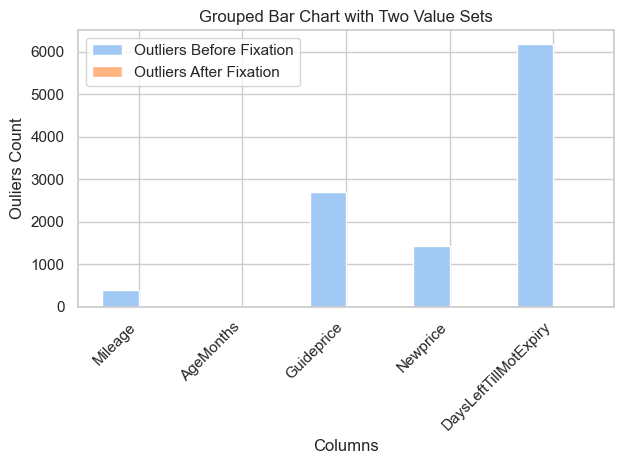

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = outliers_details['Column'].tolist()
value_set1 = outliers_details['Outliers_Before_Fixation'].tolist()
value_set2 = outliers_details['Outliers_After_Fixation'].tolist()

# Set the width of the bars
bar_width = 0.35

# Set the x-axis positions for the bars
# np.arange(len(categories)) creates an array [0, 1, 2, 3] for the categories
x = np.arange(len(categories))

# Create the bars for the first set of values
# Shift the bars slightly to the left to make space for the second set
plt.bar(x - bar_width/2, value_set1, bar_width, label='Outliers Before Fixation')

# Create the bars for the second set of values
# Shift the bars slightly to the right
plt.bar(x + bar_width/2, value_set2, bar_width, label='Outliers After Fixation')
# plt.figure(figsize=(8, 5))
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Ouliers Count')
plt.title('Grouped Bar Chart with Two Value Sets')

# Set the x-axis tick labels to the category names

plt.xticks(x, categories, rotation=45, ha='right')

# Add a legend to differentiate the value sets
plt.legend()

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
# plt.savefig("Images/outliers_fixation_comparison.png", dpi=300, bbox_inches='tight')
plt.savefig(image_S+"outliers_fixation_comparison.png", format='png',bbox_inches='tight')
plt.show()

In [55]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26857 entries, 0 to 27078
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   City                   26857 non-null  string        
 1   County                 26857 non-null  string        
 2   Category               26857 non-null  string        
 3   Manufacturer           26857 non-null  string        
 4   Model                  26857 non-null  string        
 5   Colour                 26857 non-null  string        
 6   ImageAvailable         26857 non-null  Int64         
 7   Mileage                26857 non-null  Int64         
 8   AgeMonths              26857 non-null  Int64         
 9   Fuel                   26857 non-null  string        
 10  Transmission           26857 non-null  string        
 11  Guideprice             26857 non-null  Int64         
 12  Newprice               26857 non-null  Int64         
 13  BodyTy

Note: Label encoding is one of the main key part for feature engineering and I tried to use most of the indicators, which may be discarded if not needed after the analysis to make model efficient.But for now I used Label endocding approach for all categorial indicators.

In [56]:
df=transformed_df

In [57]:
mapping_category = {'Standard': 1, 'Trade': 2, 'Premium': 3} # ordinal/ Label encoding
mapping_Fuel={'DIESEL':1,'PETROL':2,'ELECTRIC':3} # ordinal/ Label encoding
mapping_IsATaxi={'N':0,'Y':1}  # binary/ Label encoding
mapping_IsRunning={'N':0,'Y':1} # binary/ Label encoding
mapping_Transmission={'MANUAL':0,'AUTOMATIC':1} # binary/ Label encoding

# Apply the mapping
df['Category_Mapped'] = df['Category'].map(mapping_category)
df['Fuel_Mapped'] = df['Fuel'].map(mapping_Fuel)
df['IsATaxi_Mapped'] = df['IsATaxi'].map(mapping_IsATaxi)
df['IsRunning_Mapped']=df['IsRunning'].map(mapping_IsRunning)
df['Transmission_Mapped']=df['Transmission'].map(mapping_Transmission)


# There are several ways for encoding, 
# List of columns to encode
columns_to_encode = ['Manufacturer', 'Model','Colour','BodyType','Engine']
# Apply factorize() to each column in the list
for col in columns_to_encode:
    df[f'{col}_Mapped'], _ = pd.factorize(df[col])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26857 entries, 0 to 27078
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   City                   26857 non-null  string        
 1   County                 26857 non-null  string        
 2   Category               26857 non-null  string        
 3   Manufacturer           26857 non-null  string        
 4   Model                  26857 non-null  string        
 5   Colour                 26857 non-null  string        
 6   ImageAvailable         26857 non-null  Int64         
 7   Mileage                26857 non-null  Int64         
 8   AgeMonths              26857 non-null  Int64         
 9   Fuel                   26857 non-null  string        
 10  Transmission           26857 non-null  string        
 11  Guideprice             26857 non-null  Int64         
 12  Newprice               26857 non-null  Int64         
 13  BodyTy

shan do more feature eng

In [58]:
df['AgeMonths'].value_counts().values

<IntegerArray>
[6761, 6715,  465,  390,  378,  375,  374,  358,  357,  356,  350,  323,  313,
  287,  265,  248,  225,  224,  220,  218,  215,  214,  211,  210,  207,  206,
  204,  202,  200,  199,  199,  198,  190,  189,  189,  184,  179,  178,  177,
  176,  175,  172,  170,  170,  168,  161,  155,  154,  152,  151,  151,  147,
  145,  140,  139,  138,  134,  126,  105,   99,   99,   91,   88,   87,   79,
   76,   67,   67,   62,   60]
Length: 70, dtype: Int64

In [59]:
df['AgeYears']=round(df['AgeMonths']/12,2)
df['AgeYears'].value_counts()

AgeYears
13.0    6761
7.25    6715
11.0     465
12.5     390
10.0     378
        ... 
9.08      76
8.08      67
7.58      67
8.58      62
9.58      60
Name: count, Length: 70, dtype: Int64

In [60]:
df[["AgeMonths","AgeYears"]].tail(20)

,AgeMonths,AgeYears
27059,131,10.92
27060,111,9.25
27061,129,10.75
27062,156,13.0
27063,87,7.25
27064,137,11.42
27065,135,11.25
27066,146,12.17
27067,94,7.83
27068,131,10.92


In [61]:
df['PriceRatio'] = round(df['Guideprice'] / df['Newprice'],2)

In [62]:
df['MileagePerYear'] = round(df['Mileage'] / (df['AgeYears'].replace(0,0.1)),2)

In [63]:
df[["AgeMonths","AgeYears","Mileage","MileagePerYear","ImageAvailable","IsRunning","IsATaxi","Guideprice","Newprice","PriceRatio"]].tail(20)

,AgeMonths,AgeYears,Mileage,MileagePerYear,ImageAvailable,IsRunning,IsATaxi,Guideprice,Newprice,PriceRatio
27059,131,10.92,100816,9232.23,1,Y,N,1301,13340,0.1
27060,111,9.25,99675,10775.68,0,Y,N,5502,26995,0.2
27061,129,10.75,81985,7626.51,0,Y,N,5502,26995,0.2
27062,156,13.0,100816,7755.08,1,Y,N,1301,25135,0.05
27063,87,7.25,89225,12306.9,0,Y,N,4423,23535,0.19
27064,137,11.42,57189,5007.79,1,Y,N,1460,13340,0.11
27065,135,11.25,100816,8961.42,1,Y,N,2541,24850,0.1
27066,146,12.17,100816,8283.98,1,Y,N,3522,21577,0.16
27067,94,7.83,47084,6013.28,0,Y,N,4661,13340,0.35
27068,131,10.92,47084,4311.72,1,Y,N,2045,13340,0.15


Making rules for Suspicious and Overvalued rows, as it can be constraint in the data set. I am just highlighting the rows so it can be verified and fixed soon.

In [64]:
#  Calculate percentiles for PriceRatio and MileagePerYear
price_ratio_5pct = df['PriceRatio'].quantile(0.05)   # 5th percentile for extremely low price
price_ratio_10pct = df['PriceRatio'].quantile(0.10)  # 10th percentile for slightly suspicious
price_ratio_12pct = df['PriceRatio'].quantile(0.12)  # 12th percentile (optional, like non-running cars)

price_ratio_90pct = df['PriceRatio'].quantile(0.90)   # top 10% → very expensive
price_ratio_95pct = df['PriceRatio'].quantile(0.95)   # top 5% → extremely expensive

mileage_per_year_5pct = df['MileagePerYear'].quantile(0.05)  # lowest 5% mileage per year

print("Data-driven thresholds:")
print(f"PriceRatio < 5% percentile: {price_ratio_5pct}")
print(f"PriceRatio < 10% percentile: {price_ratio_10pct}")
print(f"PriceRatio < 12% percentile: {price_ratio_12pct}")
print(f"MileagePerYear < 5% percentile: {mileage_per_year_5pct}")


df['SuspiciousFlag'] = (
    ((df['PriceRatio'] < price_ratio_5pct) & (df['IsATaxi'] == 'N')) |
    ((df['AgeYears'] > 10) & (df['PriceRatio'] < price_ratio_10pct) & (df['IsATaxi'] == 'N')) |
    ((df['MileagePerYear'] < mileage_per_year_5pct) & (df['PriceRatio'] < price_ratio_10pct) & (df['IsATaxi'] == 'N')) |
    ((df['ImageAvailable'] == 0) & (df['PriceRatio'] < price_ratio_10pct) & (df['IsATaxi'] == 'N')) |
    ((df['IsRunning'] == 'N') & (df['PriceRatio'] < price_ratio_12pct) & (df['IsATaxi'] == 'N'))
).astype(int)



df['OvervaluedFlag'] = (
    ((df['PriceRatio'] > price_ratio_90pct) & (df['IsATaxi'] == 'N')) |
    ((df['AgeYears'] > 10) & (df['PriceRatio'] > price_ratio_90pct)) |
    ((df['MileagePerYear'] < 5000) & (df['PriceRatio'] > price_ratio_90pct)) |
    ((df['ImageAvailable'] == 1) & (df['PriceRatio'] > price_ratio_90pct))
).astype(int)

# suspicious_rows = df[df['SuspiciousFlag'] == 1]

df[["AgeMonths","AgeYears","Mileage","MileagePerYear","ImageAvailable","IsRunning","IsATaxi","Guideprice","Newprice","PriceRatio","SuspiciousFlag","OvervaluedFlag"]].head(20)
# # Overvalued cars
# df['OvervaluedFlag'] = ((df['PriceRatio'] > price_ratio_90pct) & (df['IsATaxi'] == 'N')).astype(int)

Data-driven thresholds:
PriceRatio < 5% percentile: 0.06
PriceRatio < 10% percentile: 0.07
PriceRatio < 12% percentile: 0.08
MileagePerYear < 5% percentile: 4237.432000000001


,AgeMonths,AgeYears,Mileage,MileagePerYear,ImageAvailable,IsRunning,IsATaxi,Guideprice,Newprice,PriceRatio,SuspiciousFlag,OvervaluedFlag
0,93,7.75,70935,9152.9,0,Y,N,3044,14485,0.21,0,0
1,125,10.42,80291,7705.47,1,Y,N,1796,20320,0.09,0,0
2,133,11.08,77043,6953.34,1,Y,N,1416,13340,0.11,0,0
3,128,10.67,76305,7151.36,1,Y,N,1301,13340,0.1,0,0
4,101,8.42,100816,11973.4,0,Y,Y,1691,26995,0.06,0,0
5,87,7.25,83508,11518.34,0,Y,N,5502,26995,0.2,0,0
6,87,7.25,53351,7358.76,0,Y,N,5502,26995,0.2,0,0
7,96,8.0,74099,9262.38,0,Y,N,4751,21220,0.22,0,0
8,131,10.92,100816,9232.23,1,Y,N,3253,22370,0.15,0,0
9,87,7.25,47084,6494.34,0,Y,N,5063,13340,0.38,0,1


In [65]:
# SuspiciousFlag
# OvervaluedFlag

suspicious_rows=df[df["SuspiciousFlag"] == 1].head(10)
suspicious_rows[["AgeMonths","AgeYears","Mileage","MileagePerYear","ImageAvailable","IsRunning","IsATaxi","Guideprice","Newprice","PriceRatio","SuspiciousFlag","OvervaluedFlag"]].head(20)



,AgeMonths,AgeYears,Mileage,MileagePerYear,ImageAvailable,IsRunning,IsATaxi,Guideprice,Newprice,PriceRatio,SuspiciousFlag,OvervaluedFlag
20,156,13.0,100816,7755.08,1,Y,N,1301,24747,0.05,1,0
43,156,13.0,100816,7755.08,1,Y,N,1301,25135,0.05,1,0
59,156,13.0,100816,7755.08,1,N,N,1301,23780,0.05,1,0
70,156,13.0,100816,7755.08,1,Y,N,1435,25077,0.06,1,0
88,156,13.0,100816,7755.08,1,Y,N,1301,26001,0.05,1,0
104,156,13.0,80742,6210.92,1,Y,N,1301,26995,0.05,1,0
112,156,13.0,100816,7755.08,1,Y,N,1301,23202,0.06,1,0
138,152,12.67,100816,7957.06,1,N,N,1382,20605,0.07,1,0
174,156,13.0,100816,7755.08,1,Y,N,1301,21805,0.06,1,0
189,126,10.5,100816,9601.52,1,Y,N,1301,20630,0.06,1,0


In [66]:
overvalued_rows=df[df["OvervaluedFlag"] == 1].head(10)
overvalued_rows[["AgeMonths","AgeYears","Mileage","MileagePerYear","ImageAvailable","IsRunning","IsATaxi","Guideprice","Newprice","PriceRatio","SuspiciousFlag","OvervaluedFlag"]].head(20)


,AgeMonths,AgeYears,Mileage,MileagePerYear,ImageAvailable,IsRunning,IsATaxi,Guideprice,Newprice,PriceRatio,SuspiciousFlag,OvervaluedFlag
9,87,7.25,47084,6494.34,0,Y,N,5063,13340,0.38,0,1
12,91,7.58,47084,6211.61,0,Y,N,5502,18970,0.29,0,1
15,89,7.42,51432,6931.54,0,Y,N,5183,16820,0.31,0,1
27,87,7.25,53649,7399.86,0,Y,N,5044,16760,0.3,0,1
37,92,7.67,53404,6962.71,0,Y,N,4237,16125,0.26,0,1
57,87,7.25,47084,6494.34,0,Y,N,4446,13340,0.33,0,1
71,107,8.92,47084,5278.48,0,Y,N,5396,17410,0.31,0,1
90,119,9.92,52433,5285.58,1,Y,N,5502,20900,0.26,0,1
94,87,7.25,47084,6494.34,0,Y,N,5502,13540,0.41,0,1
95,89,7.42,47084,6345.55,0,Y,N,4041,14940,0.27,0,1


In [67]:
transformed_df_analysis=deep_dive_rows_analysis(df,pd)
transformed_df_analysis

,Column,Data_Types,Total_values,Null_values,Not_Null_Values,Unique_Entries,Category_Type
0,City,string[python],26857,0,26857,20,Nominal/Categorical
1,County,string[python],26857,0,26857,18,Nominal/Categorical
2,Category,string[python],26857,0,26857,3,Nominal/Categorical
3,Manufacturer,string[python],26857,0,26857,54,Interval/Ratio
4,Model,string[python],26857,0,26857,1633,Potential ID/Series
5,Colour,string[python],26857,0,26857,18,Nominal/Categorical
6,ImageAvailable,Int64,26857,0,26857,2,Boolean/Binary
7,Mileage,Int64,26857,0,26857,11871,Potential ID/Series
8,AgeMonths,Int64,26857,0,26857,70,Interval/Ratio
9,Fuel,string[python],26857,0,26857,3,Nominal/Categorical


"Note: It can be clearly seen that the data is now cleaned and optimized, as there are no missing values, duplicates, or outliers (which have been capped/treated). In addition to this, several new feature engineering columns have been created which should be helpful for the machine learning process. As of now, the ETL (Extract, Transform, Load) phase is complete. The next step involves further Exploratory Data Analysis (EDA) to shortlist the most relevant features for the machine learning model."

In [69]:
directory_path = 'D:/pre-inspection-vehicle-grading/data/' # Or whatever path you are trying to save to, e.g., '../data_cleaned'


df.to_csv(directory_path+'Transformed_Vehicle_Grade.csv', index=False)


Advanced Statistical Diagnostics of Numerical Features (Distribution, Normality, Outliers, and Percentile Spread).

This exploratory profiling enabled a precise understanding of distribution behaviors, variance, normality deviations, and outlier density for each numerical attribute. These insights were critical to optimizing feature engineering decisions, improving model assumptions, and preparing the dataset for machine learning workflows.

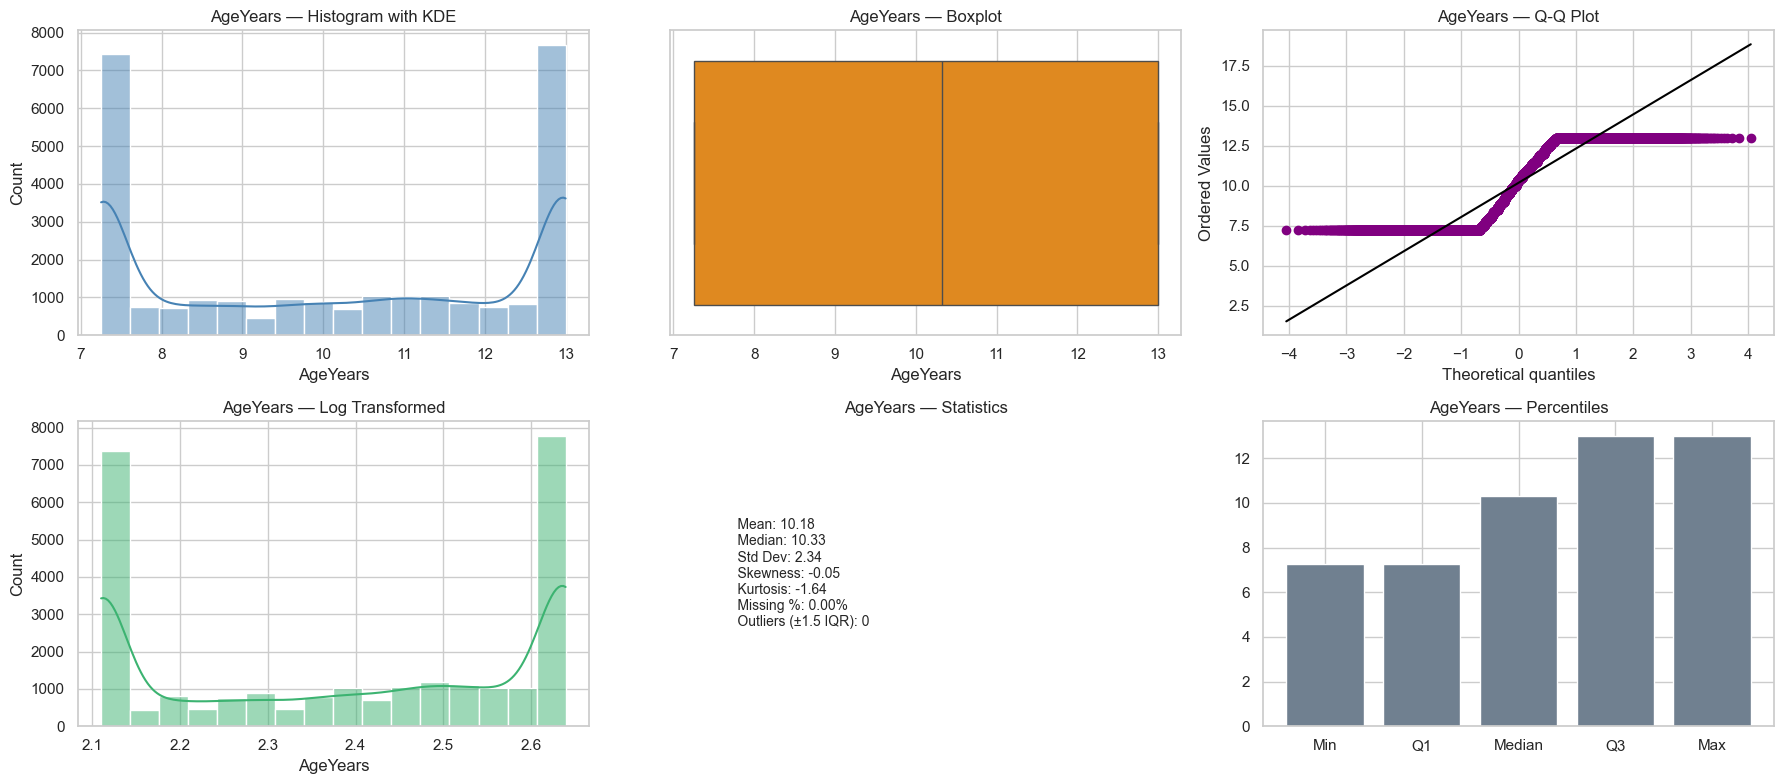

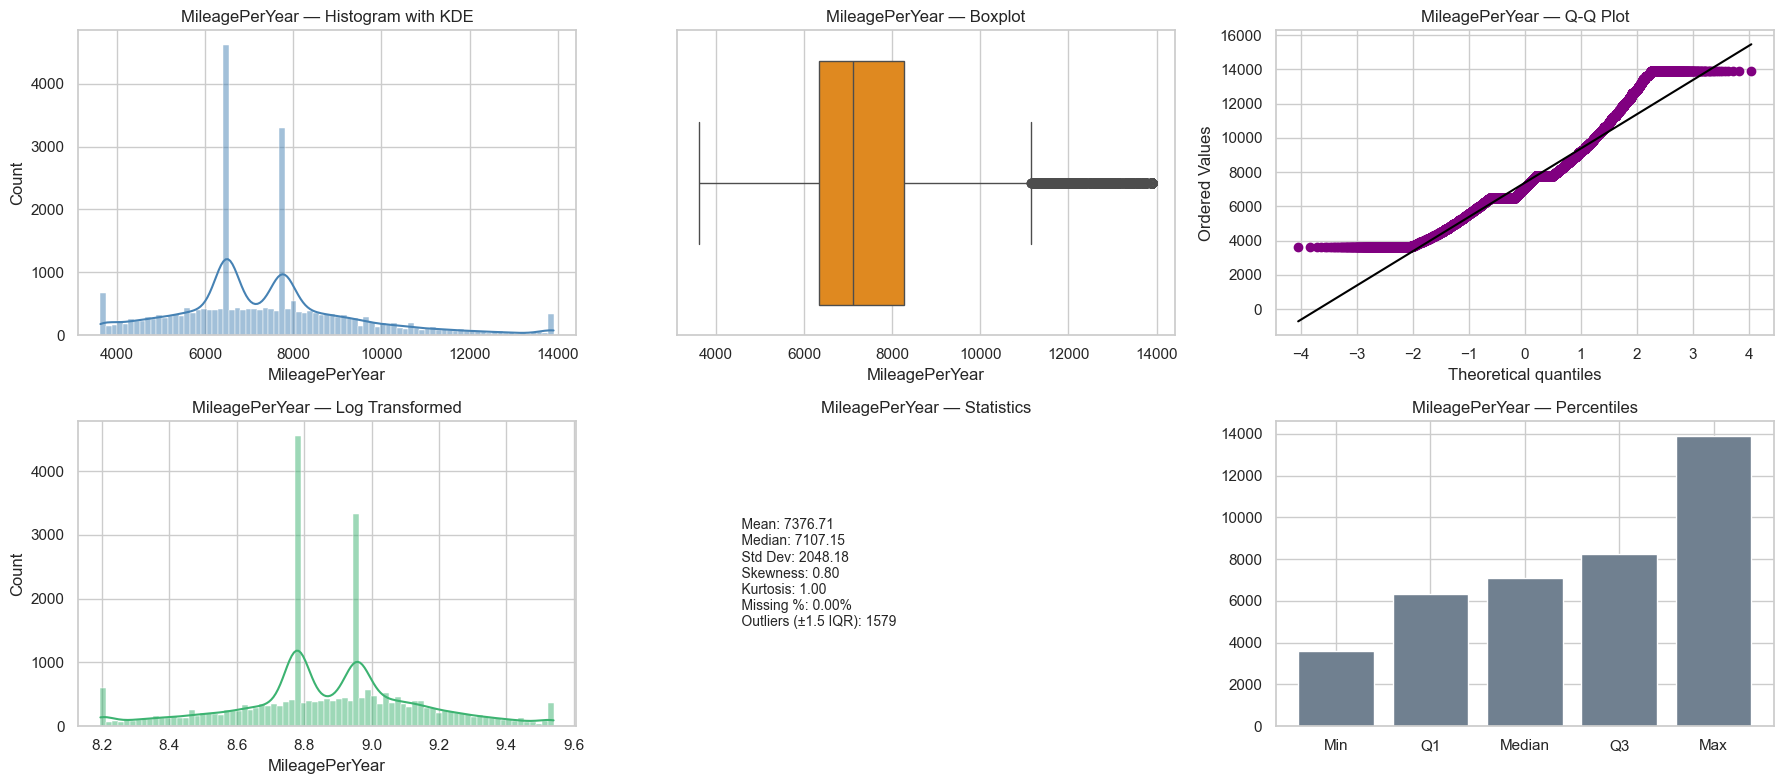

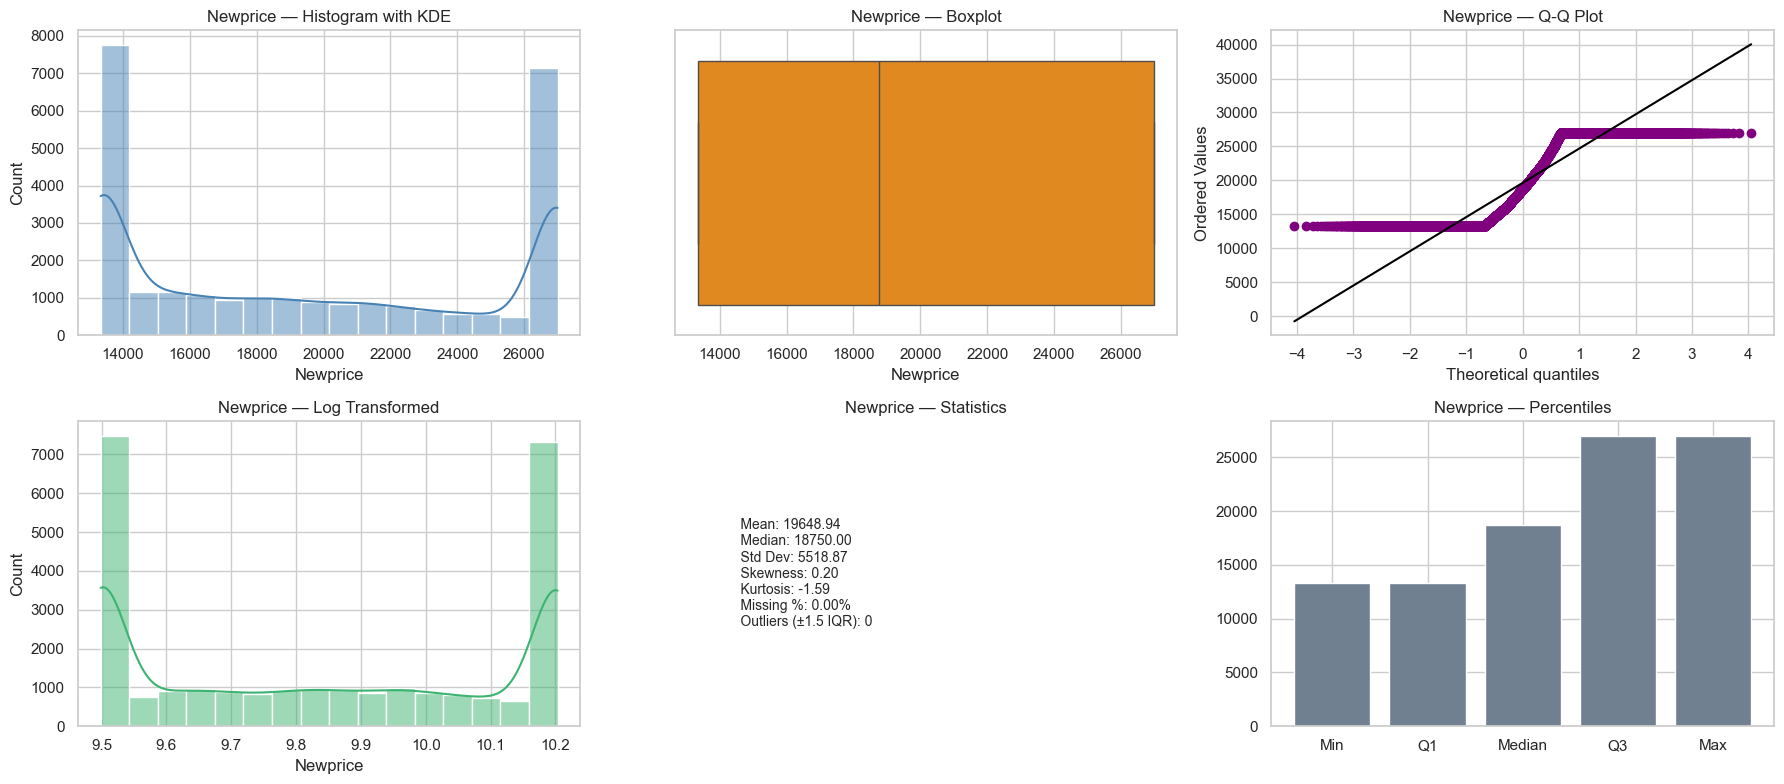

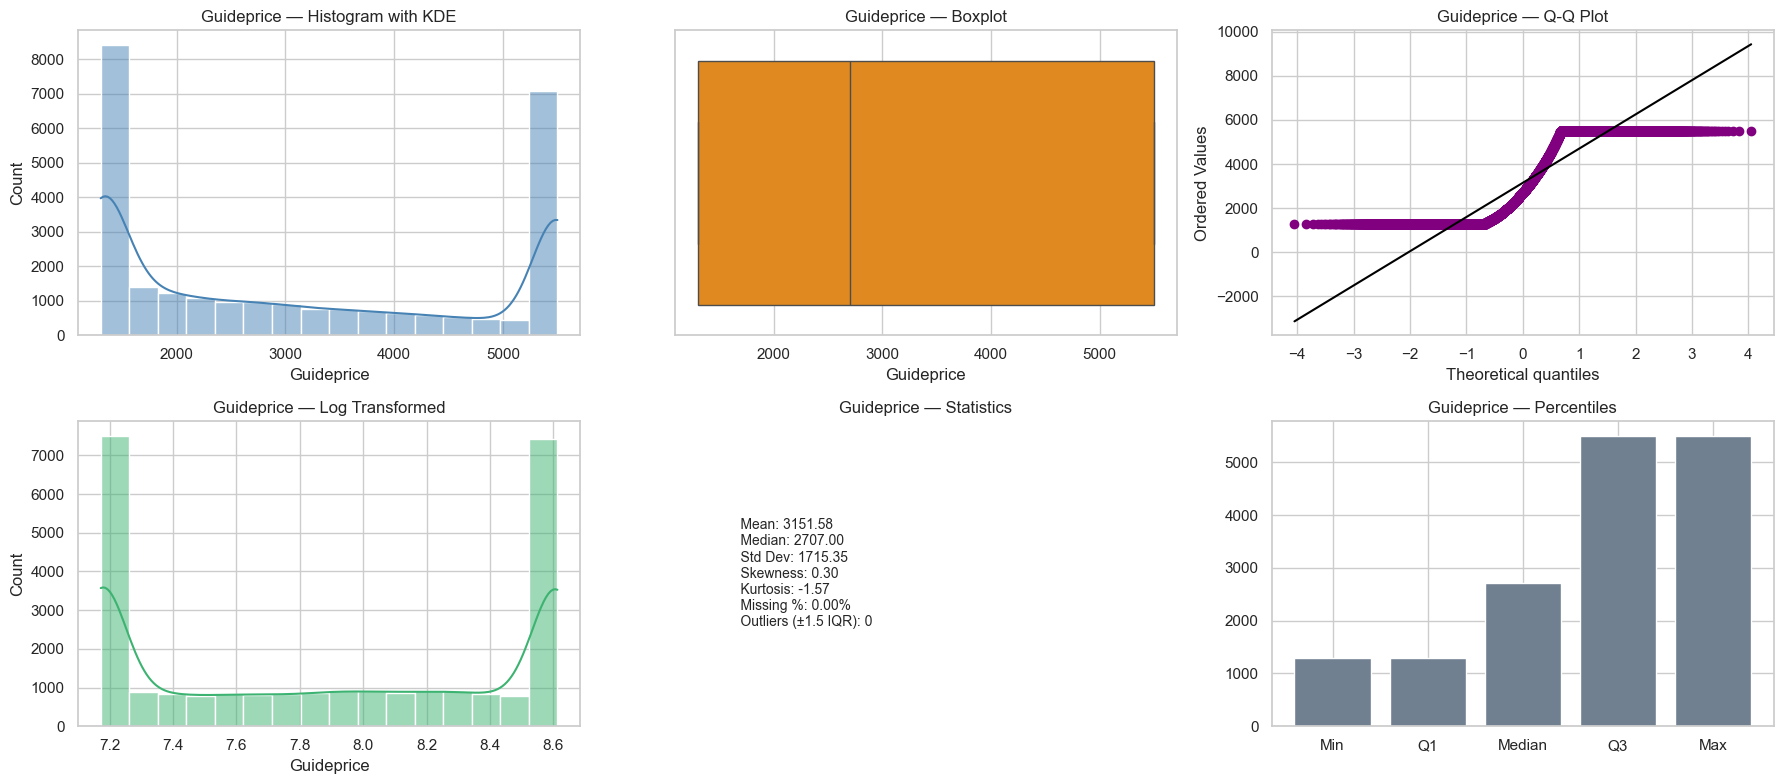

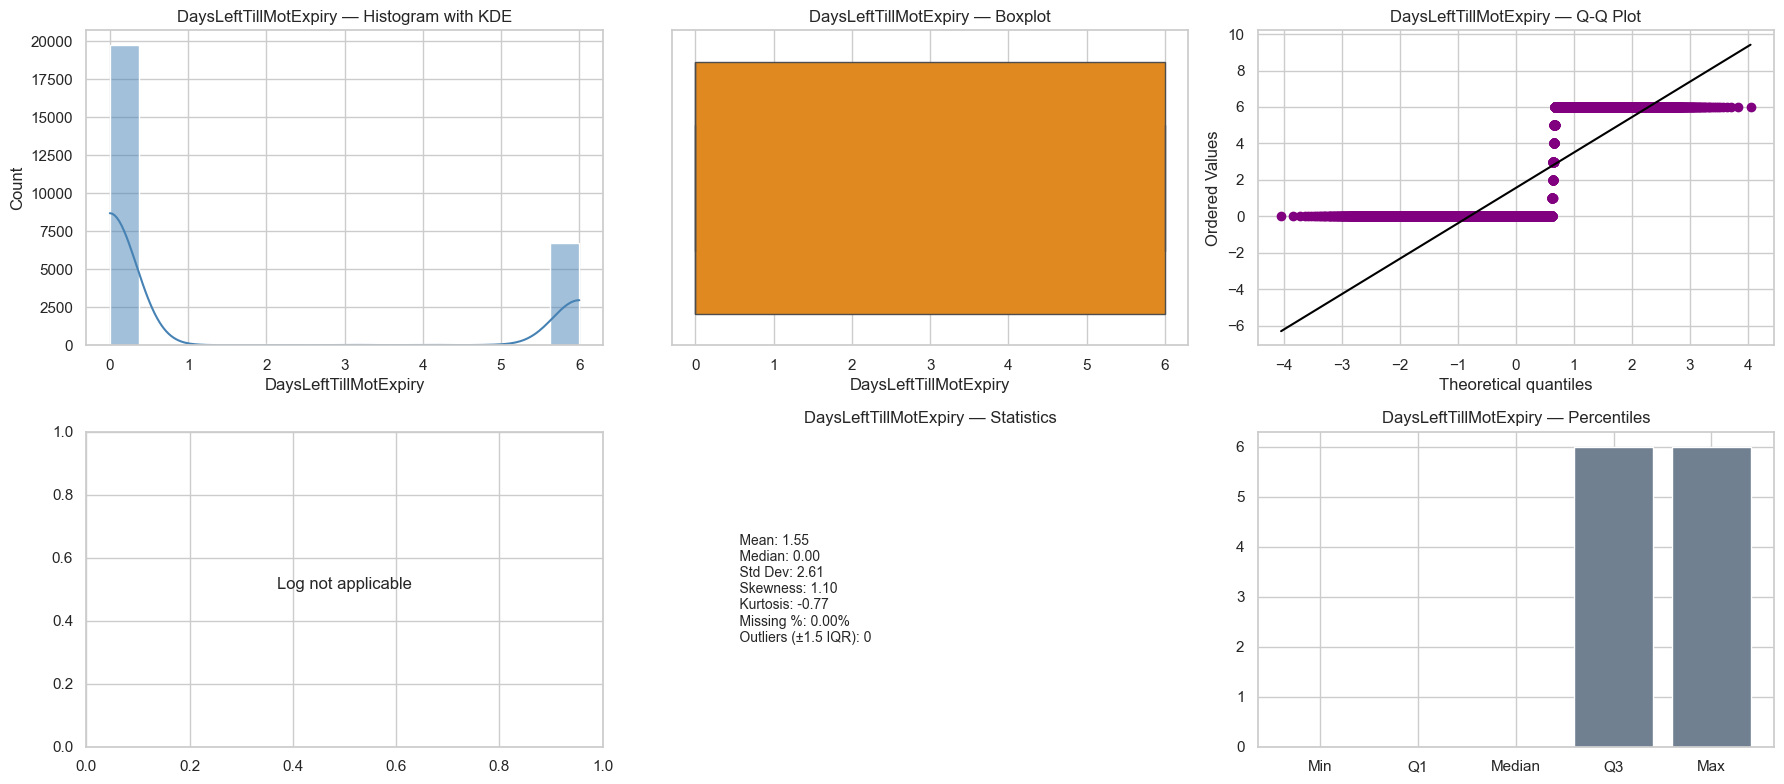

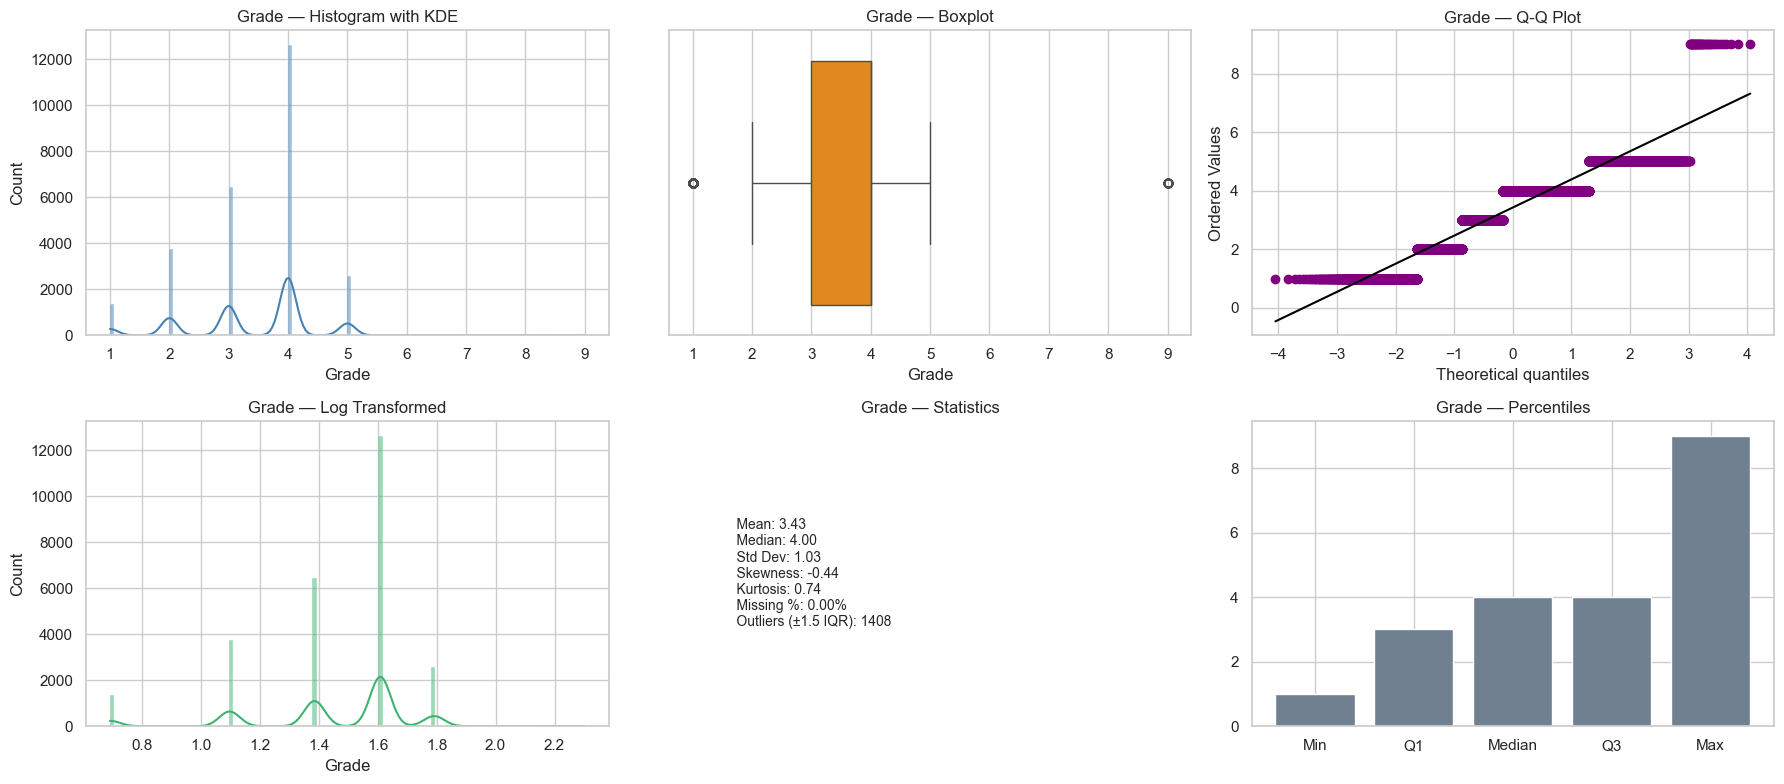

In [70]:
from scipy.stats import skew, kurtosis, shapiro, probplot
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["AgeYears","MileagePerYear","Newprice","Guideprice","DaysLeftTillMotExpiry","Grade"]
for c in num_cols:
    fig, axs = plt.subplots(2, 3, figsize=(18, 8))
    
    # 1️⃣ Histogram + Density
    sns.histplot(df[c], kde=True, ax=axs[0,0], color="steelblue")
    axs[0,0].set_title(f"{c} — Histogram with KDE")
    
    # 2️⃣ Boxplot
    sns.boxplot(x=df[c], ax=axs[0,1], color="darkorange")
    axs[0,1].set_title(f"{c} — Boxplot")
    
    # 3️⃣ QQ Plot (Normality check)
    probplot(df[c], plot=axs[0,2])
    axs[0,2].get_lines()[0].set_color('purple') 
    axs[0,2].get_lines()[1].set_color('black')
    axs[0,2].set_title(f"{c} — Q-Q Plot")
    # probplot(df[c], plot=axs[0,2])
    # axs[0,2].set_title(f"{c} — Q-Q Plot")
    
    # 4️⃣ Log Distribution (only if positive)
    if (df[c] > 0).all():
        sns.histplot(np.log1p(df[c]), kde=True, ax=axs[1,0] , color="mediumseagreen")
        axs[1,0].set_title(f"{c} — Log Transformed")
    else:
        axs[1,0].text(0.5, 0.5, 'Log not applicable', ha='center')

    # 5️⃣ Statistical Summary
    axs[1,1].axis('off')
    stats_text = f"""
    Mean: {df[c].mean():.2f}
    Median: {df[c].median():.2f}
    Std Dev: {df[c].std():.2f}
    Skewness: {skew(df[c]):.2f}
    Kurtosis: {kurtosis(df[c]):.2f}
    Missing %: {df[c].isna().mean()*100:.2f}%
    Outliers (±1.5 IQR): {((df[c] < (df[c].quantile(0.25)-1.5*(df[c].quantile(0.75)-df[c].quantile(0.25)))) |
                             (df[c] > (df[c].quantile(0.75)+1.5*(df[c].quantile(0.75)-df[c].quantile(0.25))))).sum()}
    """
    axs[1,1].text(0.1, 0.5, stats_text, fontsize=10, va="center")
    axs[1,1].set_title(f"{c} — Statistics")
    
    # 6️⃣ Percentile Spread
    percentiles = df[c].quantile([0, .25, .5, .75, 1])
    axs[1,2].bar(['Min','Q1','Median','Q3','Max'], percentiles,color="slategray")
    axs[1,2].set_title(f"{c} — Percentiles")
    
    plt.tight_layout()
    plt.savefig(image_S+f"{c}_detailed_analysis.png", format='png',bbox_inches='tight')
   
    plt.show()

    "Title: Advanced Statistical Diagnostics of Numerical Features (Distribution, Normality, Outliers, and Percentile Spread)"
    "his exploratory profiling enabled a precise understanding of distribution behaviors, variance, normality deviations, and outlier density for each numerical attribute. These insights were critical to optimizing feature engineering decisions, improving model assumptions, and preparing the dataset for machine learning workflows."


In [71]:
def kurtosis_analysis(x, pd):
    if pd.isna(x):
        category = ''
        interpretation = ''
    elif x > 3:
        category = 'Leptokurtic (Heavy-tailed)'
        interpretation = 'Higher chance of extreme values; distribution has heavy tails.'
    elif x < -1:
        category = 'Platykurtic (Light-tailed)'
        interpretation = 'Values are concentrated near the mean; fewer extreme observations.'
    else:
        category = 'Mesokurtic (Normal-like)'
        interpretation = 'Shape resembles a normal distribution.'
        
    return category, interpretation


In [72]:
def skewness_analysis(x, pd):
    # Determine category
    if pd.isna(x):
        category = ''
        interpretation = ''
    elif x < -1 or x > 1:
        category = 'Highly-Skewed'
        interpretation = 'Distribution is heavily unbalanced; likely affected by extreme values.'
    elif -0.5 <= x <= 0.5:
        category = 'Fairly-Symmetrical'
        interpretation = 'Values are evenly distributed around the center with minimal skew.'
    elif -1 <= x <= -0.5 or 0.5 <= x <= 1:
        category = 'Moderately-Skewed'
        interpretation = 'Distribution shows noticeable skew but not extreme.'
    else:
        category = 'Undefined'
        interpretation = 'Shape does not clearly match skewness thresholds.'
    
    return category, interpretation


In [73]:
def descriptive_analysis(df,meaningful_cols):

   # col_to_perform=df.select_dtypes(include='number')
   col_to_perform=df[meaningful_cols]
   print('col_to_perform',col_to_perform.columns)
   df_Descriptive=pd.DataFrame(index =['Standard Deviation', 'COV', 'Kurtosis','Kurtosis_Category','Kurtosis_Interpretation','Skewness','Skewness_Category','Skewness_Interpretation', 'Mean',"Mode",'Median_Absolute_Deviation', 
                                       'Sum', 'Variance'],columns=col_to_perform.columns.to_list()) 
   df_Descriptive=df_Descriptive.transpose()
   
   

   df_Descriptive['Standard Deviation'] = col_to_perform.apply(lambda x: round(x.std(),2) )
   df_Descriptive['COV']=col_to_perform.apply(lambda x: round(x.std()/x.mean(),2) )

   
   df_Descriptive['Kurtosis']=col_to_perform.apply(lambda x: round(x.kurtosis(),2) ) 
   df_Descriptive[['Kurtosis_Category', 'Kurtosis_Interpretation']] = df_Descriptive['Kurtosis'].apply(lambda x: pd.Series(kurtosis_analysis(x, pd)))
   

   df_Descriptive['Skewness']=col_to_perform.apply(lambda x: round(x.skew(),2) ) 
   df_Descriptive[['Skewness_Category', 'Skewness_Interpretation']] = df_Descriptive['Skewness'].apply(lambda x: pd.Series(skewness_analysis(x, pd)))
   


   df_Descriptive['Mean']=col_to_perform.apply(lambda x: "{:.2f}".format(x.mean())) 
   df_Descriptive['Mode']=col_to_perform.apply(lambda x: "{:.2f}".format(x.mode().iloc[0]))
   # df_Descriptive['Mean_DF']=col_to_perform.mean() 
   df_Descriptive['Sum']=col_to_perform.apply(lambda x: "{:.2f}".format(round(x.sum(),2)))
   df_Descriptive['Variance']=col_to_perform.apply(lambda x: "{:.2f}".format(round(x.var(),2)) )
   df_Descriptive["Median_Absolute_Deviation"] = col_to_perform.apply(lambda x: round(np.abs(x - x.median()).median(),2))
   

     
   return df_Descriptive

In [74]:
shortlisted_meaningful_cols = [
    # --- Interval/Ratio (True Numerical Data) ---
    'Mileage',              # Kilometers driven (meaningful number)
    'AgeMonths',            # Age of the car in months (meaningful number)
    'Guideprice',           # Estimated price (meaningful number)
    'Newprice',             # Original price (meaningful number)
    'Engine',               # Engine size (meaningful number)
    'DaysLeftTillMotExpiry', # Days remaining on MOT (meaningful number, lower end clipped)

    # --- Ordinal & Binary Data (Meaningful Rank/Flags) ---
    'ImageAvailable',       # Binary flag (0/1)
    'Grade',                # Car's condition grade (meaningful rank)
    'Category_Mapped',      # Car category (Standard/Trade/Premium - meaningful rank)
    'IsATaxi_Mapped',       # Binary flag (0/1)
    'IsRunning_Mapped',     # Binary flag (0/1)
    'Transmission_Mapped',  # Binary flag (0/1)
]

In [75]:

descriptive_Df=descriptive_analysis(df,shortlisted_meaningful_cols)
descriptive_Df

col_to_perform Index(['Mileage', 'AgeMonths', 'Guideprice', 'Newprice', 'Engine',
       'DaysLeftTillMotExpiry', 'ImageAvailable', 'Grade', 'Category_Mapped',
       'IsATaxi_Mapped', 'IsRunning_Mapped', 'Transmission_Mapped'],
      dtype='object')


,Standard Deviation,COV,Kurtosis,Kurtosis_Category,Kurtosis_Interpretation,Skewness,Skewness_Category,Skewness_Interpretation,Mean,Mode,Median_Absolute_Deviation,Sum,Variance
Mileage,21800.35,0.30,-1.63,Platykurtic (Light-tailed),Values are concentrated near the mean; fewer e...,0.03,Fairly-Symmetrical,Values are evenly distributed around the cente...,73671.36,47084.00,25857.0,1978591603.00,475255334.59
AgeMonths,28.09,0.23,-1.64,Platykurtic (Light-tailed),Values are concentrated near the mean; fewer e...,-0.05,Fairly-Symmetrical,Values are evenly distributed around the cente...,122.13,156.00,32.0,3280073.00,788.97
Guideprice,1715.35,0.54,-1.57,Platykurtic (Light-tailed),Values are concentrated near the mean; fewer e...,0.30,Fairly-Symmetrical,Values are evenly distributed around the cente...,3151.58,1301.00,1406.0,84641972.00,2942421.23
Newprice,5518.87,0.28,-1.59,Platykurtic (Light-tailed),Values are concentrated near the mean; fewer e...,0.20,Fairly-Symmetrical,Values are evenly distributed around the cente...,19648.94,13340.00,5410.0,527711484.00,30457965.46
Engine,6.43,0.36,5.75,Leptokurtic (Heavy-tailed),Higher chance of extreme values; distribution ...,1.74,Highly-Skewed,Distribution is heavily unbalanced; likely aff...,17.85,20.00,4.0,479398.00,41.39
DaysLeftTillMotExpiry,2.61,1.68,-0.77,Mesokurtic (Normal-like),Shape resembles a normal distribution.,1.10,Highly-Skewed,Distribution is heavily unbalanced; likely aff...,1.55,0.00,0.0,41722.00,6.80
ImageAvailable,0.50,0.90,-1.95,Platykurtic (Light-tailed),Values are concentrated near the mean; fewer e...,-0.22,Fairly-Symmetrical,Values are evenly distributed around the cente...,0.56,1.00,0.0,14906.00,0.25
Grade,1.03,0.30,0.74,Mesokurtic (Normal-like),Shape resembles a normal distribution.,-0.44,Fairly-Symmetrical,Values are evenly distributed around the cente...,3.43,4.00,1.0,92073.00,1.06
Category_Mapped,0.75,0.40,-1.17,Platykurtic (Light-tailed),Values are concentrated near the mean; fewer e...,0.24,Fairly-Symmetrical,Values are evenly distributed around the cente...,1.86,2.00,1.0,49869.00,0.56
IsATaxi_Mapped,0.05,20.46,414.72,Leptokurtic (Heavy-tailed),Higher chance of extreme values; distribution ...,20.41,Highly-Skewed,Distribution is heavily unbalanced; likely aff...,0.00,0.00,0.0,64.00,0.00


Above dataframe is the descriptive analysis to analyse destribution and behavior of data, that will very helpful for machine learning.This is very important for exploratory data analysis (EDA).

Quantile Analysis:

In [77]:
def quantile_analysis(df,meaningful_cols):
   col_to_perform=df[meaningful_cols]
   # col_to_perform=df.select_dtypes(include='number')

   df_quantile=pd.DataFrame(index =['Min', 'Max','Range', 'Fifty_percentile', 'Ninetyfive_percentile', 'First_quntile','Third_quntile', 'Median', 'IQR']
                                 ,columns=col_to_perform.columns.to_list()) 
   df_quantile=df_quantile.transpose()
   
   df_quantile['Min'] = col_to_perform.apply(lambda x: round(x.min(),2))
   df_quantile['Max'] = col_to_perform.apply(lambda x: round(x.max(),2))
   df_quantile['Fifty_percentile'] = col_to_perform.apply(lambda x: round(x.quantile(q=0.5),2))
   df_quantile['Ninetyfive_percentile'] = col_to_perform.apply(lambda x: round(x.quantile(q=0.95),2))
   df_quantile['First_quntile'] = col_to_perform.apply(lambda x: round(x.quantile(q=0.01),2))
   df_quantile['Third_quntile'] = col_to_perform.apply(lambda x: round(x.quantile(q=0.03),2))
   df_quantile['Median'] = col_to_perform.apply(lambda x: str(round(x.median(),2)))


   df_quantile['Range'] = col_to_perform.apply(lambda x: round(x.max()-x.min(),2))
   df_quantile['IQR'] = col_to_perform.apply(lambda x: round(x.quantile(0.75)-x.quantile(0.25),2))


   
   return df_quantile

In [78]:
quant_analysis=quantile_analysis(df,shortlisted_meaningful_cols)
quant_analysis

,Min,Max,Range,Fifty_percentile,Ninetyfive_percentile,First_quntile,Third_quntile,Median,IQR
Mileage,47084,100816,53732,72941.0,100816.0,47084.0,47084.0,72941.0,53732.0
AgeMonths,87,156,69,124.0,156.0,87.0,87.0,124.0,69.0
Guideprice,1301,5502,4201,2707.0,5502.0,1301.0,1301.0,2707.0,4201.0
Newprice,13340,26995,13655,18750.0,26995.0,13340.0,13340.0,18750.0,13655.0
Engine,0,62,62,16.0,30.0,9.0,10.0,16.0,6.0
DaysLeftTillMotExpiry,0,6,6,0.0,6.0,0.0,0.0,0.0,6.0
ImageAvailable,0,1,1,1.0,1.0,0.0,0.0,1.0,1.0
Grade,1,9,8,4.0,5.0,1.0,1.0,4.0,1.0
Category_Mapped,1,3,2,2.0,3.0,1.0,1.0,2.0,1.0
IsATaxi_Mapped,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0


Correlational Analysis:

Note: Need to find correlation between indicators to make sure which is strongly or weakly correlated with the target variable "Grade".

I have used pearson,kendal and spearman methods to figure out relation and rank of the indicators.

The method "get_top_correlations_with_target" return the three values, string,weak and unique pairs to understand realtions.

In [79]:
import pandas as pd
import numpy as np

def get_top_correlations_with_target(df, method_name, target_variable, no_of_relations):
    """
    Calculates correlations for numerical columns and returns the top N 
    most correlated features with a specific target variable.
    """
    # Select only numerical columns
    df_num = df.select_dtypes(include='number')
    
    # Calculate the full correlation matrix
    corr_matrix = df_num.corr(method=method_name)
    
    # Select the correlation values for the target variable only
    # .loc[] accesses the row labeled 'Grade'
    target_corr = corr_matrix.loc[target_variable]
    
    # Drop the correlation of 'Grade' with itself (which is always 1.0)
    target_corr = target_corr.drop(labels=[target_variable], errors='ignore')
    
    # Sort by absolute value to find the strongest relationships (positive or negative)
    # Use abs().sort_values(ascending=False)
    # Then re-index to get the actual correlation values back
    sorted_corrs_abs = target_corr.abs().sort_values(ascending=False)
    top_n_features_abs = sorted_corrs_abs.head(no_of_relations).index
    
    # Filter original correlation series using the top N feature names
    top_n_relations = target_corr.loc[top_n_features_abs]
    
    # Add 'Type' column for clarity
    top_n_df = top_n_relations.reset_index()
    top_n_df.columns = ['Feature', 'Correlation']
    top_n_df['Correlation'] = round(top_n_df['Correlation'], 2)
    top_n_df['Type'] = np.where(top_n_df['Correlation'] > 0, 'Directly Proportional', 'Inversely Proportional')

    return top_n_df



In [80]:

top_relation_with_target_viaPearson = get_top_correlations_with_target(df, 'pearson', 'Grade', no_of_relations=30)
print("Pearson",top_relation_with_target_viaPearson)


Pearson                   Feature  Correlation                    Type
0              Guideprice        -0.60  Inversely Proportional
1                AgeYears         0.59   Directly Proportional
2               AgeMonths         0.59   Directly Proportional
3          ImageAvailable         0.56   Directly Proportional
4              PriceRatio        -0.55  Inversely Proportional
5                 Mileage         0.49   Directly Proportional
6         Category_Mapped        -0.33  Inversely Proportional
7          OvervaluedFlag        -0.28  Inversely Proportional
8                Newprice        -0.26  Inversely Proportional
9     Transmission_Mapped        -0.20  Inversely Proportional
10         SuspiciousFlag         0.16   Directly Proportional
11           Model_Mapped        -0.13  Inversely Proportional
12       IsRunning_Mapped        -0.08  Inversely Proportional
13                 Engine        -0.08  Inversely Proportional
14  DaysLeftTillMotExpiry         0.08   Direct

In [81]:
# Example usage:
top_relation_with_target_viaKendall = get_top_correlations_with_target(df, 'kendall', 'Grade', no_of_relations=20)
print("kendall",top_relation_with_target_viaKendall)


kendall                   Feature  Correlation                    Type
0          ImageAvailable         0.53   Directly Proportional
1              Guideprice        -0.49  Inversely Proportional
2               AgeMonths         0.49   Directly Proportional
3                AgeYears         0.49   Directly Proportional
4              PriceRatio        -0.46  Inversely Proportional
5                 Mileage         0.40   Directly Proportional
6          OvervaluedFlag        -0.26  Inversely Proportional
7         Category_Mapped        -0.20  Inversely Proportional
8                Newprice        -0.20  Inversely Proportional
9     Transmission_Mapped        -0.17  Inversely Proportional
10         SuspiciousFlag         0.16   Directly Proportional
11           Model_Mapped        -0.09  Inversely Proportional
12       IsRunning_Mapped        -0.08  Inversely Proportional
13         MileagePerYear         0.07   Directly Proportional
14               MotValid         0.06   Direct

In [82]:
# Example usage:
top_relation_with_target_viaSpearman = get_top_correlations_with_target(df, 'spearman', 'Grade', no_of_relations=20)
print("spearman",top_relation_with_target_viaSpearman)

spearman                   Feature  Correlation                    Type
0              Guideprice        -0.60  Inversely Proportional
1               AgeMonths         0.60   Directly Proportional
2                AgeYears         0.60   Directly Proportional
3              PriceRatio        -0.58  Inversely Proportional
4          ImageAvailable         0.57   Directly Proportional
5                 Mileage         0.50   Directly Proportional
6          OvervaluedFlag        -0.29  Inversely Proportional
7         Category_Mapped        -0.25  Inversely Proportional
8                Newprice        -0.25  Inversely Proportional
9     Transmission_Mapped        -0.18  Inversely Proportional
10         SuspiciousFlag         0.17   Directly Proportional
11           Model_Mapped        -0.11  Inversely Proportional
12         MileagePerYear         0.10   Directly Proportional
13       IsRunning_Mapped        -0.08  Inversely Proportional
14        BodyType_Mapped        -0.07  Invers

Note: By using correlation via multiple approach, I can decide best column for my machine learning stuff considering my target variable, but still domain knowledge is very important for the machine learning stuff as sometimes you intentially you have to consider columns even its not reflecting from correlation technique.

Lets explore the column city and county for EDA.

In [83]:
df["City"].value_counts()

City
Dundee                1404
London                1384
Sheffield             1370
Swindon               1370
Luton                 1367
Glasgow               1365
Preston               1364
Nottingham            1354
Blackpool             1350
Gloucester            1347
Manchester            1343
Sunderland            1343
Derby                 1332
Bradford              1328
Kingston upon Hull    1328
Cannock               1321
Bristol               1320
Birmingham            1297
Canterbury            1291
Bolton                1279
Name: count, dtype: Int64

In [84]:
df["City"].value_counts().shape[0]

20

In [85]:
len(df)

26857

In [ ]:
print("Note: As it can clearly seen the total rows we have ",len(df), "but the unique cities are only ",df["City"].value_counts().shape[0]," so I will create a new dataframe and then use geopy to get coordinates for each city and then folium for interactive map.")

In [86]:
df_cities=pd.DataFrame()
df_cities["City"]=df["City"].value_counts().index   
df_cities["City_Value_Count"]=df["City"].value_counts().values
df_cities

,City,City_Value_Count
0,Dundee,1404
1,London,1384
2,Sheffield,1370
3,Swindon,1370
4,Luton,1367
5,Glasgow,1365
6,Preston,1364
7,Nottingham,1354
8,Blackpool,1350
9,Gloucester,1347


In [87]:
df["County"].value_counts()

County
Lancashire                     2714
Greater Manchester             2622
Angus (Council Area)           1404
Greater London                 1384
Wiltshire                      1370
South Yorkshire                1370
Bedfordshire                   1367
Glasgow (Council Area)         1365
Nottinghamshire                1354
Gloucestershire                1347
Tyne and Wear                  1343
Derbyshire                     1332
East Riding of Yorkshire       1328
West Yorkshire                 1328
Staffordshire                  1321
Bristol (Unitary Authority)    1320
West Midlands                  1297
Kent                           1291
Name: count, dtype: Int64

We have city and county but need coordinates via geopy and then folium for interactive map.

In [88]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="location_For_Car_Data", timeout=10) # Use a unique app name

# This loop can take a minute to run
def get_location(city):
    location = geolocator.geocode(f"{city}, UK") 
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

df_cities[['Latitude', 'Longitude']] = df_cities['City'].apply(lambda x: pd.Series(get_location(x)))


In [89]:
df_cities

,City,City_Value_Count,Latitude,Longitude
0,Dundee,1404,56.460594,-2.970190
1,London,1384,51.507446,-0.127765
2,Sheffield,1370,53.380663,-1.470228
3,Swindon,1370,51.561533,-1.785432
4,Luton,1367,51.878439,-0.415284
5,Glasgow,1365,55.861155,-4.250169
6,Preston,1364,53.759336,-2.699272
7,Nottingham,1354,52.953419,-1.149646
8,Blackpool,1350,53.817944,-3.050981
9,Gloucester,1347,51.865370,-2.245819


In [90]:
df_cities.to_csv(directory_path+'Cities_with_coordinates.csv', index=False)

In [91]:

import folium




m=folium.Map(tiles='OpenStreetMap', zoom_start=7, max_zoom=15, control_scale=True, location=[53.47, -2.24])



# 3. Add circular markers for each city
for index, row in df_cities.iterrows():
    # Use CircleMarker for bubbles scaled by the value count
        # folium.CircleMarker(
        #     location=[row['Latitude'], row['Longitude']],
        #     radius=row['City_Value_Count'] / 100,  # Scale the value to a visible radius (adjust 100 as needed)
        #     popup=f"**{row['City']}**<br> has {row['City_Value_Count']} Cars",
        #     color='#3186cc',
        #     fill=True,
        #     fill_color='#3186cc',
        #     fill_opacity=0.2
        # ).add_to(m)
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['City_Value_Count'] / 100,  # Scale the value to a visible radius (adjust 100 as needed)
            tooltip="Click me!",
            popup=f"<b>**{row['City']}**</b><br> has {row['City_Value_Count']} Cars",
            icon=folium.Icon(color="green")
            
        ).add_to(m)




    #     folium.CircleMarker(
    #         location=[row['Latitude'], row['Longitude']],
    #         radius=row['City_Value_Count'] / 100,
    #         tooltip=row['City'],
    #         popup=f"<b>{row['City']}</b><br>{row['City_Value_Count']} Cars",
    #         color="#28a745",        # outline color
    #         fill=True,
    #         fill_color="#28a745",   # fill color
    #         fill_opacity=0.35
    # ).add_to(m)
# tooltip="Click me!",icon=folium.Icon(color="green"),popup=f"**{row['City']}**<br> has {row['City_Value_Count']} Cars")


# Calculate bounds of all markers
max_lat, min_lat = max(df_cities['Latitude']), min(df_cities['Latitude'])
max_lon, min_lon = max(df_cities['Longitude']), min(df_cities['Longitude'])
# Set map bounds to include all markers
m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])

# # 4. Save the map to an HTML file
output_file = "uk_city_count_map.html"
# plt.savefig(image_S+"outliers_fixation_comparison.png", format='png',bbox_inches='tight')
m.save(image_S+output_file)

print(f"Map saved successfully as '{output_file}'")
print("Open the HTML file in your web browser to view the interactive map.")
display(m)


Map saved successfully as 'uk_city_count_map.html'
Open the HTML file in your web browser to view the interactive map.


df.info()

In [92]:
cross_tab_grade_county = pd.crosstab(df['Grade'], df['County'])
cross_tab_grade_county

County,Angus (Council Area),Bedfordshire,Bristol (Unitary Authority),Derbyshire,East Riding of Yorkshire,Glasgow (Council Area),Gloucestershire,Greater London,Greater Manchester,Kent,Lancashire,Nottinghamshire,South Yorkshire,Staffordshire,Tyne and Wear,West Midlands,West Yorkshire,Wiltshire
Grade,,,,,,,,,,,,,,,,,,
1,86,79,69,67,66,64,54,79,124,76,121,64,71,65,87,78,56,68
2,185,198,193,186,188,196,198,173,371,172,389,184,191,190,199,180,184,193
3,332,330,334,300,322,308,315,324,623,326,639,341,325,334,317,312,346,326
4,666,643,597,640,623,666,649,670,1242,590,1268,621,662,612,615,608,621,641
5,132,117,124,138,125,130,129,137,260,125,289,142,121,119,124,118,119,142
9,3,0,3,1,4,1,2,1,2,2,8,2,0,1,1,1,2,0


In [93]:

cross_tab_trans_taxi = pd.crosstab(df['IsATaxi'], df['Transmission'])
cross_tab_trans_taxi

# Transmission           

Transmission,AUTOMATIC,MANUAL
IsATaxi,,
N,10090,16703
Y,36,28


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26857 entries, 0 to 27078
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   City                   26857 non-null  string        
 1   County                 26857 non-null  string        
 2   Category               26857 non-null  string        
 3   Manufacturer           26857 non-null  string        
 4   Model                  26857 non-null  string        
 5   Colour                 26857 non-null  string        
 6   ImageAvailable         26857 non-null  Int64         
 7   Mileage                26857 non-null  Int64         
 8   AgeMonths              26857 non-null  Int64         
 9   Fuel                   26857 non-null  string        
 10  Transmission           26857 non-null  string        
 11  Guideprice             26857 non-null  Int64         
 12  Newprice               26857 non-null  Int64         
 13  BodyTy

In [95]:
df["AgeMonths"].value_counts().values

<IntegerArray>
[6761, 6715,  465,  390,  378,  375,  374,  358,  357,  356,  350,  323,  313,
  287,  265,  248,  225,  224,  220,  218,  215,  214,  211,  210,  207,  206,
  204,  202,  200,  199,  199,  198,  190,  189,  189,  184,  179,  178,  177,
  176,  175,  172,  170,  170,  168,  161,  155,  154,  152,  151,  151,  147,
  145,  140,  139,  138,  134,  126,  105,   99,   99,   91,   88,   87,   79,
   76,   67,   67,   62,   60]
Length: 70, dtype: Int64

test

In [96]:
def target_analysis(pd, df, target_variable):

    # Create summary table
    target_df = pd.DataFrame()
    target_df['Target_Value'] = df[target_variable].value_counts().index
    target_df['Frequency'] = df[target_variable].value_counts().values
    target_df['Percentage'] = round((target_df['Frequency'] / target_df['Frequency'].sum()) * 100, 2)

    # Nested function for applying row-by-row
    def target_labeling(percentage):
        if percentage > 40:
            return pd.Series([
                'Majority Class',
                'This value is dominant in the dataset. No action needed.'
            ])
        elif percentage > 20:
            return pd.Series([
                'Well-Represented',
                'This value is well-represented. Model can learn this class easily.'
            ])
        elif percentage > 5:
            return pd.Series([
                'Moderate Frequency',
                'Moderate frequency — monitor predictions for this class.'
            ])
        else:
            return pd.Series([
                'Low Frequency / Rare',
                'Very few samples — may require oversampling (SMOTE), class weights, or merging.'
            ])

    # Apply row-wise only on the Percentage column
    target_df[['Target_Label', 'Target_Interpretation']] = target_df['Percentage'].apply(target_labeling)

    return target_df


In [97]:
target_analysis_df=target_analysis(pd,df,'Grade')
target_analysis_df

,Target_Value,Frequency,Percentage,Target_Label,Target_Interpretation
0,4,12634,47.04,Majority Class,This value is dominant in the dataset. No acti...
1,3,6454,24.03,Well-Represented,This value is well-represented. Model can lear...
2,2,3770,14.04,Moderate Frequency,Moderate frequency — monitor predictions for t...
3,5,2591,9.65,Moderate Frequency,Moderate frequency — monitor predictions for t...
4,1,1374,5.12,Moderate Frequency,Moderate frequency — monitor predictions for t...
5,9,34,0.13,Low Frequency / Rare,Very few samples — may require oversampling (S...


Grade 9 has a very low number of samples, which may lead to poor model learning and biased predictions. To address this class imbalance, we can consider the following approaches:

Oversampling (e.g., SMOTE or random oversampling) to artificially increase Grade 9 representation and help the model better generalize.

Removing Grade 9 instances, but this should only be considered if the class is not critical for prediction, because deleting data reduces information and may bias the model.

But, for now I am considering all transformed data for my machine learning multi-class classification.

For training data set I am using only numeric indicators.

In [98]:
print("Pearson",top_relation_with_target_viaPearson)

Pearson                   Feature  Correlation                    Type
0              Guideprice        -0.60  Inversely Proportional
1                AgeYears         0.59   Directly Proportional
2               AgeMonths         0.59   Directly Proportional
3          ImageAvailable         0.56   Directly Proportional
4              PriceRatio        -0.55  Inversely Proportional
5                 Mileage         0.49   Directly Proportional
6         Category_Mapped        -0.33  Inversely Proportional
7          OvervaluedFlag        -0.28  Inversely Proportional
8                Newprice        -0.26  Inversely Proportional
9     Transmission_Mapped        -0.20  Inversely Proportional
10         SuspiciousFlag         0.16   Directly Proportional
11           Model_Mapped        -0.13  Inversely Proportional
12       IsRunning_Mapped        -0.08  Inversely Proportional
13                 Engine        -0.08  Inversely Proportional
14  DaysLeftTillMotExpiry         0.08   Direct

In [99]:
df.columns

Index(['City', 'County', 'Category', 'Manufacturer', 'Model', 'Colour',
       'ImageAvailable', 'Mileage', 'AgeMonths', 'Fuel', 'Transmission',
       'Guideprice', 'Newprice', 'BodyType', 'Engine', 'MotExpireDate',
       'IsRunning', 'IsATaxi', 'Grade', 'CurrentDate', 'DaysLeftTillMotExpiry',
       'MotValid', 'Category_Mapped', 'Fuel_Mapped', 'IsATaxi_Mapped',
       'IsRunning_Mapped', 'Transmission_Mapped', 'Manufacturer_Mapped',
       'Model_Mapped', 'Colour_Mapped', 'BodyType_Mapped', 'Engine_Mapped',
       'AgeYears', 'PriceRatio', 'MileagePerYear', 'SuspiciousFlag',
       'OvervaluedFlag'],
      dtype='object')

The feature selection was performed using a combination of statistical correlation with the target variable (Grade) and domain expertise. While some features may show weaker correlation numerically, they are retained because they carry meaningful real-world influence on vehicle grading and therefore add practical value to the model.

In [100]:
col_list=[
 'PriceRatio',
 'Mileage',
 'MileagePerYear',
 'AgeYears',
 'ImageAvailable',
 'IsRunning_Mapped',
 'IsATaxi_Mapped',
 'Transmission_Mapped',
 'Fuel_Mapped',
 'Manufacturer_Mapped',
 'Model_Mapped',
 'BodyType_Mapped',
 'Engine_Mapped',
 'MotValid',
 'DaysLeftTillMotExpiry',
 'SuspiciousFlag',
 'OvervaluedFlag',
  'Grade'
]

df_Model=df[col_list]
df_Model.size

483426

In [101]:
# import libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [102]:
label_encoder = LabelEncoder()


df_Model_Train=df_Model.drop('Grade',axis=1)



X = df_Model_Train
y = df_Model['Grade']
# y = df_Model['Grade_Mapped']

y_train_encoded = label_encoder.fit_transform(y)


# Split data into training + validation and testing sets (80% train_val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_train_encoded, test_size=0.2, random_state=42)

# Further split training + validation data into training and validation sets (90% train, 10% validation from the 80% train_val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)



print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 19336
Validation set size: 2149
Test set size: 5372


In [103]:
y_train_encoded

array([1, 3, 3, ..., 4, 3, 1], shape=(26857,))

I created the custom method with the parameters to predict the value and return the scoring metrices to validate model. For scoring model I have used multiple metrice e.g  Accuracy,Precision,Recall,F1_score and Cross_validation.

I perform 5-fold cross-validation with same proportion of classes in each fold (for imbalanced datasets).

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,balanced_accuracy_score,hamming_loss,jaccard_score

def find_best_Model(row,X_train, X_test, y_train, y_test):
    
    try:

        model_lambda = row['model_lambda']

        model=model_lambda()
        model.fit(X_train, y_train)
        y_Prediction=model.predict(X_test)
        
        #  Decode predictions back to original labels if necessary
        y_Prediction_decoded = label_encoder.inverse_transform(y_Prediction)
        

            # Perform 5-fold cross-validation
        cross_val = cross_val_score(model, X_train, y_train, cv=5)
            
        score=accuracy_score(y_test,y_Prediction)




        # Target variable is imbalanced data, need  to focus on majority classes but also considering minority
        precision=precision_score(y_test, y_Prediction,average='weighted')
        recall=recall_score(y_test, y_Prediction,average='weighted')
        fscore=f1_score(y_test, y_Prediction,average='weighted')

        MCC= matthews_corrcoef(y_test, y_Prediction)
        Cohen_Kappa= cohen_kappa_score(y_test, y_Prediction)
        Balanced_Accuracy= balanced_accuracy_score(y_test, y_Prediction)
        Hamming_Loss= hamming_loss(y_test, y_Prediction)
        Jaccard= jaccard_score(y_test, y_Prediction, average='macro')
        
        # precision=precision_score(y_test, y_Prediction,average='micro')
        # recall=recall_score(y_test, y_Prediction,average='micro')
        # fscore=f1_score(y_test, y_Prediction,average='micro')
        
        # precision=precision_score(y_test, y_Prediction,average='macro')
        # recall=recall_score(y_test, y_Prediction,average='macro')
        # fscore=f1_score(y_test, y_Prediction,average='macro')
        
        



        
        
        row['Accuracy']=score
        row['Precision']=precision
        row['Recall']=recall
        row['F1_score']=fscore
        row['Cross_validation']=cross_val.mean()
        
        row['matthews_corrcoef']=MCC
        row['cohen_kappa_score']=Cohen_Kappa
        row['balanced_accuracy_score']=Balanced_Accuracy
        row['hamming_loss']=Hamming_Loss
        row['jaccard_score']=Jaccard
        
        
        # Add decoded predictions to the row (optional)
        row['Decoded_Predictions'] = y_Prediction_decoded.tolist()
    

    # cm = confusion_matrix(y_test, y_Prediction, normalize='true')

    # plt.figure(figsize=(6,4))
    # sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    # plt.title(f"Confusion Matrix - {row['Model']}")
    # plt.xlabel("Predicted")
    # plt.ylabel("Actual")
    # plt.show()

    # # print("confusion_matrix", confusion_matrix(y_test, y_Prediction))
    # # print("confusion_matrix", confusion_matrix(y_test, y_Prediction))
    # print(classification_report(y_test, y_Prediction))
    except FloatingPointError:
        print("❌ FloatingPointError caused by:", row['Model'])
        row['Error'] = "FloatingPointError"
    return row


I have used multiple machine learning algorithms for multiclass classification problem. 

In [105]:
# import libraries 
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier     # (best for categorical data)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Model Collection
models_df = pd.DataFrame([




        {'Model': 'Logistic Regression', 'model_lambda': lambda: LogisticRegression(max_iter=600)},
        {'Model': 'Linear SVM', 'model_lambda': lambda: LinearSVC()},
        {'Model': 'Kernel SVM (RBF)', 'model_lambda': lambda: SVC()},
        {'Model': 'Stochastic Gradient Descent', 'model_lambda': lambda: SGDClassifier()},
        {'Model': 'Ridge Classifier', 'model_lambda': lambda: RidgeClassifier()},

        {'Model': 'Decision Tree', 'model_lambda': lambda: DecisionTreeClassifier()},
        {'Model': 'Random Forest', 'model_lambda': lambda: RandomForestClassifier(n_estimators=100)},
        {'Model': 'Extra Trees Classifier', 'model_lambda': lambda: ExtraTreesClassifier()},
        {'Model': 'Bagging Classifier', 'model_lambda': lambda: BaggingClassifier()},

        {'Model': 'Gradient Boosting', 'model_lambda': lambda: GradientBoostingClassifier()},
        {'Model': 'AdaBoost', 'model_lambda': lambda: AdaBoostClassifier()},

        {'Model': 'KNN', 'model_lambda': lambda: KNeighborsClassifier()},

        {'Model': 'Gaussian NB', 'model_lambda': lambda: GaussianNB()},
        {'Model': 'Multinomial NB', 'model_lambda': lambda: MultinomialNB()},

        {'Model': 'Neural Network (MLP)', 'model_lambda': lambda: MLPClassifier(max_iter=600)},

        # BOOSTING MODELS (Best performers)
        {'Model': 'XGBoost', 'model_lambda': lambda: XGBClassifier(eval_metric="mlogloss")},
        {'Model': 'LightGBM', 'model_lambda': lambda: LGBMClassifier()},
        {'Model': 'CatBoost', 'model_lambda': lambda: CatBoostClassifier(verbose=False)},
])


In [106]:
models_df

,Model,model_lambda
0,Logistic Regression,<function <lambda> at 0x0000028FBC00CFE0>
1,Linear SVM,<function <lambda> at 0x0000028FBC1C2840>
2,Kernel SVM (RBF),<function <lambda> at 0x0000028FB8F9EA20>
3,Stochastic Gradient Descent,<function <lambda> at 0x0000028FB8F9ED40>
4,Ridge Classifier,<function <lambda> at 0x0000028FBC2F9440>
5,Decision Tree,<function <lambda> at 0x0000028FBC2F9260>
6,Random Forest,<function <lambda> at 0x0000028FBC2F9620>
7,Extra Trees Classifier,<function <lambda> at 0x0000028FBC2F9580>
8,Bagging Classifier,<function <lambda> at 0x0000028FBC2F94E0>
9,Gradient Boosting,<function <lambda> at 0x0000028FBC2F96C0>


In [107]:
rowDF= models_df.apply(find_best_Model, axis=1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

rowDF


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1003
[LightGBM] [Info] Number of data points in the train set: 19336, number of used features: 17
[LightGBM] [Info] Start training from score -2.962969
[LightGBM] [Info] Start training from score -1.967236
[LightGBM] [Info] Start training from score -1.428332
[LightGBM] [Info] Start training from score -0.751499
[LightGBM] [Info] Start training from score -2.347865
[LightGBM] [Info] Start training from score -6.468527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1001
[LightGBM] [Info] Number of data points in the train set: 15468

,Model,model_lambda,Accuracy,Precision,Recall,F1_score,Cross_validation,matthews_corrcoef,cohen_kappa_score,balanced_accuracy_score,hamming_loss,jaccard_score,Decoded_Predictions
0,Logistic Regression,<function <lambda> at 0x0000028FBC00CFE0>,0.559382,0.458818,0.559382,0.483588,0.558905,0.331802,0.310170,0.296868,0.440618,0.179023,"[4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ..."
1,Linear SVM,<function <lambda> at 0x0000028FBC1C2840>,0.550633,0.440838,0.550633,0.480633,0.556320,0.299215,0.282476,0.274553,0.449367,0.173255,"[4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ..."
2,Kernel SVM (RBF),<function <lambda> at 0x0000028FB8F9EA20>,0.564594,0.461785,0.564594,0.489333,0.553113,0.336144,0.314768,0.297889,0.435406,0.182199,"[4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ..."
3,Stochastic Gradient Descent,<function <lambda> at 0x0000028FB8F9ED40>,0.537044,0.400320,0.537044,0.457253,0.450472,0.272485,0.252551,0.232878,0.462956,0.144137,"[4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, ..."
4,Ridge Classifier,<function <lambda> at 0x0000028FBC2F9440>,0.572040,0.473721,0.572040,0.505707,0.570283,0.348139,0.331460,0.304727,0.427960,0.190367,"[4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ..."
5,Decision Tree,<function <lambda> at 0x0000028FBC2F9260>,0.464073,0.462828,0.464073,0.463045,0.457592,0.222052,0.221994,0.326871,0.535927,0.206760,"[4.0, 1.0, 2.0, 1.0, 3.0, 1.0, 4.0, 3.0, 4.0, ..."
6,Random Forest,<function <lambda> at 0x0000028FBC2F9620>,0.544490,0.500600,0.544490,0.513742,0.539460,0.305067,0.299898,0.339228,0.455510,0.228250,"[4.0, 1.0, 3.0, 3.0, 3.0, 1.0, 4.0, 4.0, 4.0, ..."
7,Extra Trees Classifier,<function <lambda> at 0x0000028FBC2F9580>,0.540395,0.503462,0.540395,0.516039,0.530306,0.305035,0.301426,0.349234,0.459605,0.232597,"[4.0, 1.0, 2.0, 3.0, 3.0, 1.0, 4.0, 4.0, 4.0, ..."
8,Bagging Classifier,<function <lambda> at 0x0000028FBC2F94E0>,0.520849,0.494356,0.520849,0.504173,0.512877,0.283076,0.281438,0.339852,0.479151,0.225515,"[4.0, 1.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, ..."
9,Gradient Boosting,<function <lambda> at 0x0000028FBC2F96C0>,0.574646,0.516061,0.574646,0.530077,0.577213,0.348559,0.338806,0.348152,0.425354,0.234596,"[4.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 4.0, 4.0, ..."


In [108]:
# Define weights
weights = {
    'Accuracy': 0.10,
    'Precision': 0.10,
    'Recall': 0.25,
    'F1_score': 0.25,
    'Cross_validation': 0.10,
    'matthews_corrcoef': 0.07,
    'cohen_kappa_score': 0.06,
    'balanced_accuracy_score': 0.05,
    'hamming_loss': -0.01,  # Negative weight because lower is better
    'jaccard_score': 0.01
}

# Apply weighted score calculation
rowDF['Total Score'] = (
    rowDF['Accuracy'] * weights['Accuracy'] +
    rowDF['Precision'] * weights['Precision'] +
    rowDF['Recall'] * weights['Recall'] +
    rowDF['F1_score'] * weights['F1_score'] +
    rowDF['Cross_validation'] * weights['Cross_validation'] +
    rowDF['matthews_corrcoef'] * weights['matthews_corrcoef'] +
    rowDF['cohen_kappa_score'] * weights['cohen_kappa_score'] +
    rowDF['balanced_accuracy_score'] * weights['balanced_accuracy_score'] +
    rowDF['hamming_loss'] * weights['hamming_loss'] +  # SUBTRACTS automatically
    rowDF['jaccard_score'] * weights['jaccard_score']
)

rowDF['Percentage'] = round(rowDF['Total Score'] * 100, 2)


In [109]:
rowDF=rowDF.drop("model_lambda",axis=1)

rowDF

,Model,Accuracy,Precision,Recall,F1_score,Cross_validation,matthews_corrcoef,cohen_kappa_score,balanced_accuracy_score,hamming_loss,jaccard_score,Decoded_Predictions,Total Score,Percentage
0,Logistic Regression,0.559382,0.458818,0.559382,0.483588,0.558905,0.331802,0.310170,0.296868,0.440618,0.179023,"[4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ...",0.472517,47.25
1,Linear SVM,0.550633,0.440838,0.550633,0.480633,0.556320,0.299215,0.282476,0.274553,0.449367,0.173255,"[4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ...",0.461456,46.15
2,Kernel SVM (RBF),0.564594,0.461785,0.564594,0.489333,0.553113,0.336144,0.314768,0.297889,0.435406,0.182199,"[4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ...",0.476210,47.62
3,Stochastic Gradient Descent,0.537044,0.400320,0.537044,0.457253,0.450472,0.272485,0.252551,0.232878,0.462956,0.144137,"[4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, ...",0.430041,43.00
4,Ridge Classifier,0.572040,0.473721,0.572040,0.505707,0.570283,0.348139,0.331460,0.304727,0.427960,0.190367,"[4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ...",0.488159,48.82
5,Decision Tree,0.464073,0.462828,0.464073,0.463045,0.457592,0.222052,0.221994,0.326871,0.535927,0.206760,"[4.0, 1.0, 2.0, 1.0, 3.0, 1.0, 4.0, 3.0, 4.0, ...",0.412144,41.21
6,Random Forest,0.544490,0.500600,0.544490,0.513742,0.539460,0.305067,0.299898,0.339228,0.455510,0.228250,"[4.0, 1.0, 3.0, 3.0, 3.0, 1.0, 4.0, 4.0, 4.0, ...",0.477050,47.71
7,Extra Trees Classifier,0.540395,0.503462,0.540395,0.516039,0.530306,0.305035,0.301426,0.349234,0.459605,0.232597,"[4.0, 1.0, 2.0, 3.0, 3.0, 1.0, 4.0, 4.0, 4.0, ...",0.476154,47.62
8,Bagging Classifier,0.520849,0.494356,0.520849,0.504173,0.512877,0.283076,0.281438,0.339852,0.479151,0.225515,"[4.0, 1.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, ...",0.460221,46.02
9,Gradient Boosting,0.574646,0.516061,0.574646,0.530077,0.577213,0.348559,0.338806,0.348152,0.425354,0.234596,"[4.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 4.0, 4.0, ...",0.503200,50.32


In [110]:
topfive_rows = rowDF.nlargest(5, 'Percentage')
topfive_rows

,Model,Accuracy,Precision,Recall,F1_score,Cross_validation,matthews_corrcoef,cohen_kappa_score,balanced_accuracy_score,hamming_loss,jaccard_score,Decoded_Predictions,Total Score,Percentage
9,Gradient Boosting,0.574646,0.516061,0.574646,0.530077,0.577213,0.348559,0.338806,0.348152,0.425354,0.234596,"[4.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 4.0, 4.0, ...",0.503200,50.32
16,LightGBM,0.572599,0.518382,0.572599,0.530390,0.566508,0.348354,0.339402,0.355386,0.427401,0.237955,"[4.0, 1.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ...",0.502120,50.21
17,CatBoost,0.572971,0.516820,0.572971,0.530355,0.563974,0.347403,0.338119,0.353745,0.427029,0.238050,"[4.0, 1.0, 4.0, 2.0, 2.0, 1.0, 4.0, 4.0, 4.0, ...",0.501611,50.16
15,XGBoost,0.564966,0.509585,0.564966,0.525125,0.559629,0.336172,0.327987,0.348359,0.435034,0.233422,"[4.0, 1.0, 3.0, 1.0, 2.0, 2.0, 4.0, 4.0, 4.0, ...",0.494554,49.46
4,Ridge Classifier,0.572040,0.473721,0.572040,0.505707,0.570283,0.348139,0.331460,0.304727,0.427960,0.190367,"[4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, ...",0.488159,48.82


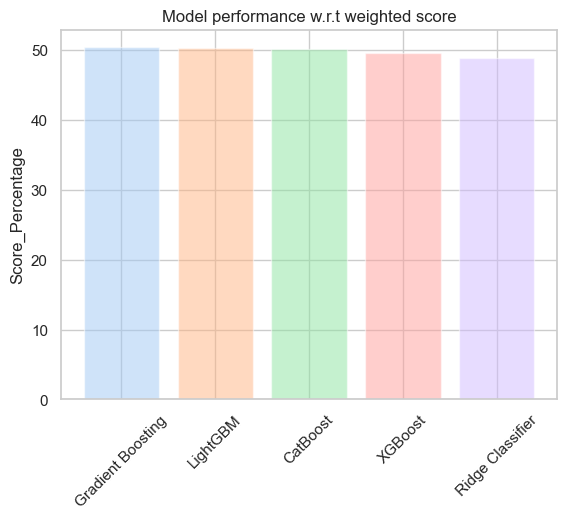

In [111]:


# topfive_rows = rowDF.nlargest(5, 'Percentage')
# Create labels and counts for plotting
labels = topfive_rows["Model"]
counts = topfive_rows["Percentage"]


# skyblue
plt.bar(labels, counts, color=colors, alpha=0.5)
plt.xticks(rotation=45)
# plt.xlabel('Category')
plt.ylabel('Score_Percentage')
plt.title('Model performance w.r.t weighted score')
plt.savefig(image_S+"Top_model_selection.png", format='png', bbox_inches='tight')
plt.show()
# print(counts)

Converting all dataframes into HTML

In [112]:
cols_analysis=df_cols.to_html()
col_df_dTypes=df_dTypes_info.to_html()

col_null_rows_analysis=df_null_rows.to_html()
col_rows_analysis_after=df_rows_after.to_html()

col_transformed_df=transformed_df_analysis.to_html()

col_cross_tab_trans_taxi=cross_tab_trans_taxi.to_html()
col_cross_tab_grade_county=cross_tab_grade_county.to_html()

col_descriptive_Df=descriptive_Df.to_html()
col_quant_analysis=quant_analysis.to_html()
col_top_relation_with_target_viaPearson=top_relation_with_target_viaPearson.to_html()

col_target_analysis_df=target_analysis_df.to_html()


rowDF_=rowDF.drop("Decoded_Predictions",axis=1)
col_rowDF=rowDF_.to_html()

df_head=df.head(10).to_html()




In [113]:
file = open("Pre-inspection-Vehicle-Classification-Case-Study.html","w")

file.write("""
<html>
<head>
<title>Rana Attique | Pre-Inspection Vehicle Classification - Case Study (2025)</title>
<link rel='stylesheet' href='https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css'>
<script src='https://ajax.googleapis.com/ajax/libs/jquery/3.6.0/jquery.min.js'></script>
<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js'></script>

<style>
table {border-collapse: collapse; width:100%;}
th, td {padding: 6px; text-align: center; border-bottom: 2px solid #ddd; font-size:14px;}
tr:hover {background-color: #f0f8ff;}
h2, h3, h4 {padding-top: 10px;}
li {margin-bottom:8px;}
</style>
</head>

<body>
<div class='container'>

<center>
<h2><b>Pre-Inspection Vehicle Classification Case Study (ML-Driven)</b></h2>
<h4>Presented By: <b>Rana Touqeer Attique</b></h4>
<a href='https://www.linkedin.com/in/rprof' target='_blank'><b>Visit LinkedIn Profile</b></a>

           
<section class="my-3" style="text-align:center;">
  <h6 style="margin-top:8px; font-weight:600;">
    This dataset has been curated exclusively for research and learning purposes using a combination of simulated (Mockaroo) and real-world samples. 
    The project follows a complete end-to-end data and machine learning lifecycle — beginning with Extract-Transform-Load (ETL), data cleaning, 
    imputation, exploratory analysis, correlation diagnostics, feature engineering, and multi-class machine learning with performance evaluation 
    to ensure insights are statistically valid and practically actionable.
  </h6>

  <div class="mt-3" style="text-align:center;">
    <strong>Key stages covered:</strong><br>

    <ul style="display:inline-block; text-align:left; margin-top:8px;">
      <li>Extract–Transform–Load (ETL) Process</li>
      <li>Data Cleaning and Wrangling</li>
      <li>Imputation: Missing Values & Outlier Treatment</li>
      <li>Exploratory Data Analysis (EDA)</li>
      <li>Descriptive and Quantile Analysis</li>
      <li>Correlation (Linear & Rank-Based)</li>
      <li>Feature Engineering</li>
      <li>Data Preparation for Multi-Class Classification</li>
      <li>Model Training & Testing</li>
      <li>Performance Evaluation using Multiple Metrics</li>
    </ul>
  </div>
</section>


 <hr>
<h4><b> Data Preparation & Standardization</b></h4>

<h6><b>• Column Naming & Structural Validation</b></h6>
<li>Identified inconsistencies including unnamed columns, special characters, numeric headers, and spacing issues, followed by normalization to ensure schema integrity.</li>
""" + cols_analysis + """

<h6><b>• Data Type Optimization</b></h6>
<li>Converted data types to the most semantically accurate formats, improving computational efficiency and supporting downstream analytical and machine learning processes.</li>
""" + col_df_dTypes + """
<img src='""" + image_S + """col_datatype_chart.png' alt='Chart Missing'><br><br>

<h6><b>• Row Integrity – Missing Values, Duplicates & Valid Records</b></h6>
<img src='""" + image_S + """Rows_analysis.png' alt='Chart Missing'>
<li>Null-value examination completed with category-wise profiling including completeness, uniqueness, and data role classification.</li>
""" + col_null_rows_analysis + """
<li>Following cleansing, the dataset contains <b>zero missing values</b>, ensuring reliability for statistical modeling and ML workflows.</li>
""" + col_rows_analysis_after + """

<h6><b>• Outlier Detection & Treatment</b></h6>
<img src='""" + image_S + """outliers_fixation_comparison.png' alt='Chart Missing'>
<li>Outliers were detected using IQR isolation and adjusted where required to prevent skewed model learning and maintain feature stability.</li>
""" + col_transformed_df + """

<hr>
<h4><b>2. Exploratory Data Insights & Analytical Diagnostics</b></h4>

<h6><b>• Geographical Distribution by City</b></h6>
<iframe src='""" + image_S + """uk_city_count_map.html' width='800' height='600' frameborder='0'></iframe>

<h6><b>• Cross-Categorical Analysis</b></h6>
<li>Vehicle Grade vs County</li>""" + col_cross_tab_grade_county + """
<li>Transmission vs Taxi Classification</li>""" + col_cross_tab_trans_taxi + """

<h6><b>• Advanced Statistical Diagnostics of Numerical Features</b></h6>
<li>Exploring distribution shape, normality, transformation impact, percentile spread, and outlier density for each numerical feature.</li>
<img src='""" + image_S + """AgeYears_detailed_analysis.png'><br>
<img src='""" + image_S + """MileagePerYear_detailed_analysis.png'><br>
<img src='""" + image_S + """Newprice_detailed_analysis.png'><br>
<img src='""" + image_S + """Guideprice_detailed_analysis.png'><br>
<img src='""" + image_S + """Grade_detailed_analysis.png'><br><br>

<h6><b>Descriptive Statistics Overview</b></h6>
""" + col_descriptive_Df + """

<h6><b>Quantile Spread and Boundary Insights</b></h6>
""" + col_quant_analysis + """

<h6><b>Feature Correlation With Target Variable (Grade)</b></h6>
""" + col_top_relation_with_target_viaPearson + """

<h6><b>Target Attribute Diagnostic Summary</b></h6>
""" + col_target_analysis_df + """

<hr>
<h4><b>3. Machine Learning Strategy & Model Performance</b></h4>

<h6><b>Model Evaluation – Weighted Score Performance</b></h6>
""" + col_rowDF + """
<img src='""" + image_S + """Top_model_selection.png'><br><br>

<h6><b>Sample Extract (First 10 Rows)</b></h6>
""" + df_head + """

</div></body></html>
""")

file.close()


In [ ]:
df_merged = df.merge(df_cities[['City', 'Latitude', 'Longitude']], 
                          on='City', 
                          how='left')



In [115]:
df_merged.head()

,City,County,Category,Manufacturer,Model,Colour,ImageAvailable,Mileage,AgeMonths,Fuel,...,Colour_Mapped,BodyType_Mapped,Engine_Mapped,AgeYears,PriceRatio,MileagePerYear,SuspiciousFlag,OvervaluedFlag,Latitude,Longitude
0,Bristol,Bristol (Unitary Authority),Standard,MINI,HATCHBACK DIESEL,Red,0,70935,93,DIESEL,...,0,0,0,7.75,0.21,9152.9,0,0,51.453802,-2.597298
1,Derby,Derbyshire,Standard,VAUXHALL,ASTRA DIESEL HATCHBACK,White,1,80291,125,DIESEL,...,1,0,1,10.42,0.09,7705.47,0,0,52.914223,-1.471988
2,Sheffield,South Yorkshire,Trade,SEAT,IBIZA SPORT COUPE,Black,1,77043,133,PETROL,...,2,0,2,11.08,0.11,6953.34,0,0,53.380663,-1.470228
3,Bradford,West Yorkshire,Trade,VAUXHALL,CORSA HATCHBACK,White,1,76305,128,PETROL,...,1,0,3,10.67,0.1,7151.36,0,0,53.794423,-1.751919
4,Derby,Derbyshire,Trade,FORD,GALAXY DIESEL ESTATE,Black,0,100816,101,DIESEL,...,2,1,4,8.42,0.06,11973.4,0,0,52.914223,-1.471988


In [ ]:
df_merged.to_csv(directory_path+"dataset_with_coordinates.csv", index=False)


Conclusion: 

This project developed an automated system for pre-inspection vehicle grading using Python and machine learning. By processing and analyzing vehicle data, the system can accurately predict vehicle conditions, reducing manual effort and improving consistency. The solution demonstrates how data-driven approaches can optimize inspection workflows, providing a reliable and scalable tool for automotive assessments.